<a href="https://colab.research.google.com/github/ignaciosoto04/Projects/blob/main/Credit_Score_Classification_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statistics import mode
import seaborn as sns
import matplotlib.pyplot as plt

Read the data

In [ ]:
credit_info = pd.read_csv('CreditInformation.csv')
credit_info.head(16)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


ID Customer_ID     Month             Name   Age          SSN  \
0   0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
1   0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
2   0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
3   0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
4   0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
5   0x1607   CUS_0xd40      June    Aaron Maashoh    23  821-00-0265   
6   0x1608   CUS_0xd40      July    Aaron Maashoh    23  821-00-0265   
7   0x1609   CUS_0xd40    August              NaN    23    #F%$D@*&8   
8   0x160e  CUS_0x21b1   January  Rick Rothackerj   28_  004-07-5839   
9   0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   
10  0x1610  CUS_0x21b1     March  Rick Rothackerj    28  004-07-5839   
11  0x1611  CUS_0x21b1     April  Rick Rothackerj    28  004-07-5839   
12  0x1612  CUS_0x21b1       May  Rick Rothackerj    28  004-07-5839   
13  0x1613  CUS_0x21b1      June  Rick Rothackerj    28  004-07-5839   
14  0x1614  CUS_0x21b1      July  Rick Rothackerj    28  004-07-5839   
15  0x1615  CUS_0x21b1    August  Rick Rothackerj    28  004-07-5839   

   Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0   Scientist      19114.12            1824.843333                3.0  ...   
1   Scientist      19114.12                    NaN                3.0  ...   
2   Scientist      19114.12                    NaN                3.0  ...   
3   Scientist      19114.12                    NaN                3.0  ...   
4   Scientist      19114.12            1824.843333                3.0  ...   
5   Scientist      19114.12                    NaN                3.0  ...   
6   Scientist      19114.12            1824.843333                3.0  ...   
7   Scientist      19114.12            1824.843333                3.0  ...   
8     _______      34847.84            3037.986667                2.0  ...   
9     Teacher      34847.84            3037.986667                2.0  ...   
10    Teacher     34847.84_            3037.986667                2.0  ...   
11    Teacher      34847.84                    NaN                2.0  ...   
12    Teacher      34847.84            3037.986667                2.0  ...   
13    Teacher      34847.84            3037.986667                2.0  ...   
14    Teacher      34847.84                    NaN                2.0  ...   
15    Teacher      34847.84            3037.986667                2.0  ...   

    Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0            _            809.98                26.822620   
1         Good            809.98                31.944960   
2         Good            809.98                28.609352   
3         Good            809.98                31.377862   
4         Good            809.98                24.797347   
5         Good            809.98                27.262259   
6         Good            809.98                22.537593   
7         Good            809.98                23.933795   
8         Good            605.03                24.464031   
9         Good            605.03                38.550848   
10           _            605.03                33.224951   
11        Good            605.03                39.182656   
12        Good            605.03                34.977895   
13        Good            605.03                33.381010   
14        Good            605.03                31.131702   
15        Good            605.03                32.933856   

        Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0    22 Years and 1 Months                     No           49.574949   
1                      NaN                     No           49.574949   
2    22 Years and 3 Months                     No           49.574949   
3    22 Years and 4 Months                     No           49.574949   
4    22 Years and 5 Months                     No    

# EDA

Check columns

In [ ]:
credit_info.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Delete unnecesary columns

In [ ]:
credit_info.drop(columns=['ID', 'Name', 'SSN'], inplace = True)

Concise summary of the dataframe

In [ ]:
credit_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  object 
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  object 
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  object 
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    92998 non-null   object 
 13  Changed_Credit_Limit      100000 non-null  ob

Unique values

In [ ]:
for i in credit_info:
  print({i})
  print(credit_info[i].unique())
  print()

{'Customer_ID'}
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']

{'Month'}
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

{'Age'}
['23' '-500' '28_' ... '4808_' '2263' '1342']

{'Occupation'}
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

{'Annual_Income'}
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

{'Monthly_Inhand_Salary'}
[1824.843333         nan 3037.986667 ... 3097.008333 1929.906667
 3359.415833]

{'Num_Bank_Accounts'}
[   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 1647 1696 1338  649  889 1668  685  857  975 1496
 1534 1620   37 1388 1429 1332 1588  120 1777 1096  803  494  744 1139
  831 1613  741  121  665 1748 1644  823 1356 1651   87  711  450  210
 1671 1722  648  672 1662 1495  510  666  429 1131 1434  

I am going to fix all the issues for each column.

Customer_ID and Month are ok.

Next column is Age. It has errors.

## Age

In [ ]:
credit_info['Age'].describe()

count     100000
unique      1788
top           38
freq        2833
Name: Age, dtype: object

In [ ]:
credit_info['Age'].unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

Before converting it to float, first I have to fix the values that have "_"

In [ ]:
credit_info['Age'] = credit_info['Age'].str.strip('_')

In [ ]:
credit_info['Age'] = credit_info['Age'].astype('float')

In [ ]:
credit_info['Age'].describe()

count    100000.000000
mean        110.649700
std         686.244717
min        -500.000000
25%          24.000000
50%          33.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64

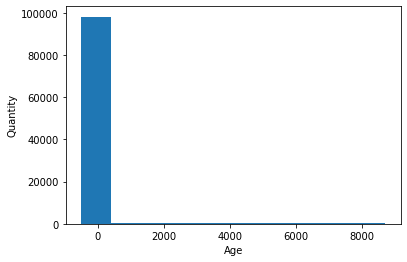

In [ ]:
plt.hist(credit_info['Age'])
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.show() 

Check Ages between 0 and 100 to see how the plot looks

In [ ]:
age_counts = credit_info['Age'][credit_info['Age'] > 0][credit_info['Age'] < 100]

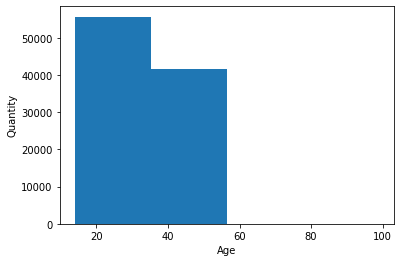

In [ ]:
plt.hist(age_counts, bins=4)
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.show() 

In [ ]:
age_counts.describe()

count    97223.000000
mean        33.322588
std         10.776843
min         14.000000
25%         24.000000
50%         33.000000
75%         42.000000
max         99.000000
Name: Age, dtype: float64

I am only going to consider Ages between 14 and 99.

In [ ]:
# List1 is created to find the ages not between 14 and 99 inclusive
list1 = []
for i in credit_info['Age']:
  if i < 14 or i > 99:
    list1.append(i)
print(list1)

[-500.0, 7580.0, -500.0, 181.0, 995.0, 5079.0, 6409.0, -500.0, 7080.0, 849.0, -500.0, 3885.0, 3052.0, 5342.0, 4431.0, -500.0, 2657.0, 2111.0, 1032.0, -500.0, 456.0, 5717.0, -500.0, -500.0, -500.0, 3169.0, 1191.0, -500.0, 7140.0, -500.0, -500.0, 8233.0, 6955.0, -500.0, 2534.0, 3115.0, 7657.0, 5112.0, -500.0, 6452.0, 2744.0, -500.0, 1439.0, 5795.0, 4872.0, -500.0, 1772.0, 1383.0, 5657.0, -500.0, 1934.0, -500.0, 8352.0, -500.0, 3734.0, -500.0, 2056.0, -500.0, 7508.0, 2339.0, 8406.0, 1424.0, -500.0, -500.0, -500.0, -500.0, 6953.0, 5626.0, 4471.0, 548.0, -500.0, -500.0, -500.0, -500.0, 769.0, -500.0, -500.0, -500.0, 5490.0, 525.0, 4202.0, 3665.0, 7670.0, -500.0, 4670.0, 3616.0, 6922.0, 6619.0, 1808.0, 7992.0, 223.0, 1232.0, 4659.0, 6895.0, 395.0, 7099.0, -500.0, 6048.0, 3936.0, -500.0, 3512.0, 123.0, -500.0, 5639.0, 471.0, -500.0, 7359.0, 4049.0, 5053.0, 2109.0, 7183.0, 5604.0, 1206.0, 6835.0, -500.0, 4067.0, 1812.0, 1170.0, 3625.0, -500.0, 6354.0, 3724.0, 480.0, -500.0, -500.0, -500.0, 561

Ages not between 14 and 99, will be replaced by Na's

In [ ]:
for i in credit_info['Age']:
  if i in list1:
    credit_info['Age'] = credit_info['Age'].replace(i, np.nan)

In [ ]:
credit_info['Age'].describe()

count    97223.000000
mean        33.322588
std         10.776843
min         14.000000
25%         24.000000
50%         33.000000
75%         42.000000
max         99.000000
Name: Age, dtype: float64

In [ ]:
credit_info['Age'].isna().sum()

2777

Now, I will replace each Age with the maximum age for each Customer_ID

In [ ]:
credit_info['Age'] = credit_info.groupby(by=['Customer_ID'])['Age'].transform('max')

Check if Age is fixed

In [ ]:
print("AGE:")
print("Number of NAs = ",credit_info['Age'].isna().sum())
print("Number of Nulls = ",credit_info['Age'].isnull().sum())
print("Number of 0s = ",credit_info['Age'][credit_info['Age']==0].value_counts().sum())

AGE:
Number of NAs =  0
Number of Nulls =  0
Number of 0s =  0


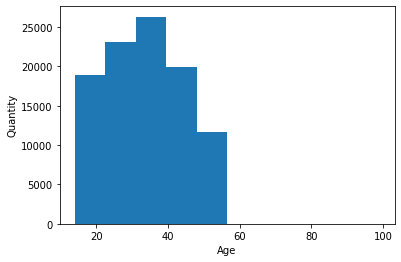

In [ ]:
plt.hist(credit_info['Age'])
plt.xlabel('Age')
plt.ylabel('Quantity')
plt.show()

Check how mane values are older than 60

In [ ]:
credit_info['Age'][credit_info['Age']>=60].value_counts().sum()

32

In [ ]:
credit_info[['Customer_ID','Age']][credit_info['Age']>=60]

Customer_ID   Age
28712  CUS_0xc24a  99.0
28713  CUS_0xc24a  99.0
28714  CUS_0xc24a  99.0
28715  CUS_0xc24a  99.0
28716  CUS_0xc24a  99.0
28717  CUS_0xc24a  99.0
28718  CUS_0xc24a  99.0
28719  CUS_0xc24a  99.0
38248  CUS_0x7e94  95.0
38249  CUS_0x7e94  95.0
38250  CUS_0x7e94  95.0
38251  CUS_0x7e94  95.0
38252  CUS_0x7e94  95.0
38253  CUS_0x7e94  95.0
38254  CUS_0x7e94  95.0
38255  CUS_0x7e94  95.0
65416   CUS_0xdc8  95.0
65417   CUS_0xdc8  95.0
65418   CUS_0xdc8  95.0
65419   CUS_0xdc8  95.0
65420   CUS_0xdc8  95.0
65421   CUS_0xdc8  95.0
65422   CUS_0xdc8  95.0
65423   CUS_0xdc8  95.0
78560  CUS_0x1dd3  95.0
78561  CUS_0x1dd3  95.0
78562  CUS_0x1dd3  95.0
78563  CUS_0x1dd3  95.0
78564  CUS_0x1dd3  95.0
78565  CUS_0x1dd3  95.0
78566  CUS_0x1dd3  95.0
78567  CUS_0x1dd3  95.0

Assumption: those are their real Age. I will leave them like that.

All good for Age.

## Occupation

Reviewing values

In [ ]:
credit_info['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

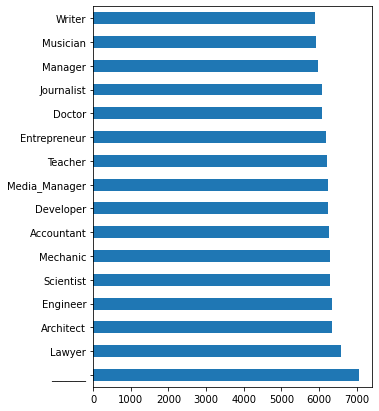

In [ ]:
credit_info['Occupation'].value_counts().plot.barh(figsize = (5,7))

2 problems found:


1.   Value '_______'
2.   Value '_' in Media_Manager



First, delete de '_' in Media Manager

In [ ]:
for i in credit_info['Occupation']:
  if i == 'Media_Manager':
    credit_info['Occupation'] = credit_info['Occupation'].replace(i, 'Media Manager')

Second, fix the '_____' value

1. Change to Na

In [ ]:
for i in credit_info['Occupation']:
  if i == '_______':
    credit_info['Occupation'] = credit_info['Occupation'].replace(i, np.nan)

2. Fill Occupations NA's with the mode for each customer

In [ ]:
credit_info['Occupation'] = credit_info.groupby('Customer_ID')['Occupation'].transform(lambda x: x.fillna(stats.mode(x)[0][0]))

In [ ]:
credit_info['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

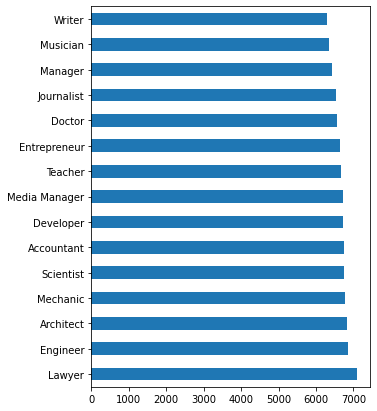

In [ ]:
credit_info['Occupation'].value_counts().plot.barh(figsize = (5,7))

All done with Occupation

## Annual Income

In [ ]:
credit_info['Annual_Income'].describe()

count       100000
unique       18940
top       36585.12
freq            16
Name: Annual_Income, dtype: object

In [ ]:
credit_info['Annual_Income'].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

Erase '_' in some values

In [ ]:
credit_info['Annual_Income'] = credit_info['Annual_Income'].str.strip('_')

Change it to float

In [ ]:
credit_info['Annual_Income'] = credit_info['Annual_Income'].astype('float')

In [ ]:
credit_info['Annual_Income'].unique()

array([ 19114.12,  34847.84, 143162.64, ...,  37188.1 ,  20002.88,
        39628.99])

In [ ]:
credit_info['Annual_Income'].describe()

count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

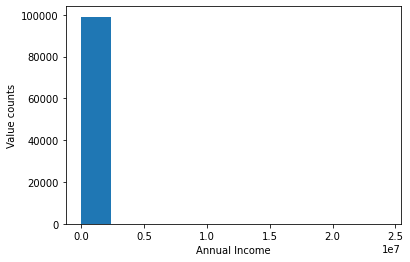

In [ ]:
plt.hist(credit_info['Annual_Income'])
plt.xlabel('Annual Income')
plt.ylabel('Value counts')
plt.show()

In [ ]:
credit_info[['Customer_ID','Annual_Income']][credit_info['Annual_Income'] >= 1000000]

Customer_ID  Annual_Income
54     CUS_0x284a     10909427.0
231    CUS_0xbffe      6515990.0
361    CUS_0x8e9b     18334118.0
368    CUS_0x609d     19717385.0
379    CUS_0x75c6      2709655.0
...           ...            ...
99664   CUS_0xb09      5794377.0
99714  CUS_0xadbd     11712577.0
99721  CUS_0x11c7      8544730.0
99882  CUS_0x47fa     16884797.0
99945  CUS_0x51b3     10152115.0

[961 rows x 2 columns]

In [ ]:
credit_info[['Customer_ID','Annual_Income']][credit_info['Customer_ID'] == 'CUS_0x284a']

Customer_ID  Annual_Income
48  CUS_0x284a       131313.4
49  CUS_0x284a       131313.4
50  CUS_0x284a       131313.4
51  CUS_0x284a       131313.4
52  CUS_0x284a       131313.4
53  CUS_0x284a       131313.4
54  CUS_0x284a     10909427.0
55  CUS_0x284a       131313.4

There are wrong values

Check min, max, median, mean for each customer to see which is the best stat to change for the wrong values

In [ ]:
credit_info.groupby(['Customer_ID'])['Monthly_Inhand_Salary'].agg(['min','max','median','mean',pd.Series.mode])

min          max       median         mean         mode
Customer_ID                                                                 
CUS_0x1000   2706.161667  2706.161667  2706.161667  2706.161667  2706.161667
CUS_0x1009   4250.390000  4250.390000  4250.390000  4250.390000      4250.39
CUS_0x100b   9549.782500  9549.782500  9549.782500  9549.782500    9549.7825
CUS_0x1011   5208.872500  5208.872500  5208.872500  5208.872500    5208.8725
CUS_0x1013   7962.415000  7962.415000  7962.415000  7962.415000     7962.415
...                  ...          ...          ...          ...          ...
CUS_0xff3    1176.398750  1176.398750  1176.398750  1176.398750   1176.39875
CUS_0xff4    2415.855000  2415.855000  2415.855000  2415.855000     2415.855
CUS_0xff6    9727.326667  9727.326667  9727.326667  9727.326667  9727.326667
CUS_0xffc    5218.097500  5218.097500  5218.097500  5218.097500    5218.0975
CUS_0xffd    3749.870000  3749.870000  3749.870000  3749.870000      3749.87

[12500 rows x 5 columns]

I will use Median in this case to fix the wrong values

In [ ]:
credit_info['Annual_Income'] = credit_info.groupby(by=['Customer_ID'])['Annual_Income'].transform('median')

In [ ]:
credit_info['Annual_Income'].describe()

count    100000.000000
mean      50505.123449
std       38299.422093
min        7005.930000
25%       19342.972500
50%       36999.705000
75%       71683.470000
max      179987.280000
Name: Annual_Income, dtype: float64

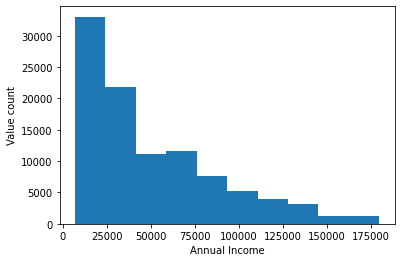

In [ ]:
plt.hist(credit_info['Annual_Income'])
plt.xlabel('Annual Income')
plt.ylabel('Value count')
plt.show()

Now looks better.

All done with Annual Income

## Monthly Inhand Salary

In [ ]:
credit_info['Monthly_Inhand_Salary'].describe()

count    84998.000000
mean      4194.170850
std       3183.686167
min        303.645417
25%       1625.568229
50%       3093.745000
75%       5957.448333
max      15204.633330
Name: Monthly_Inhand_Salary, dtype: float64

It has less than 100000 values, so there might be some Na's

In [ ]:
credit_info['Monthly_Inhand_Salary'].isna().sum()

15002

In [ ]:
credit_info['Monthly_Inhand_Salary'].unique()

array([1824.843333,         nan, 3037.986667, ..., 3097.008333,
       1929.906667, 3359.415833])

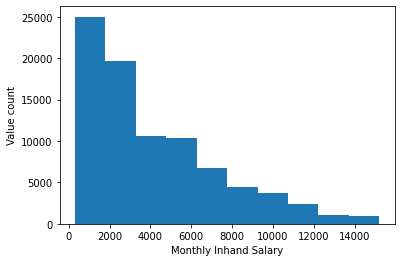

In [ ]:
plt.hist(credit_info['Monthly_Inhand_Salary'])
plt.xlabel('Monthly Inhand Salary')
plt.ylabel('Value count')
plt.show()

Check min, max, median, mean for each customer to see which is the best stats to change instead of the Na's

In [ ]:
credit_info.groupby(['Customer_ID'])['Monthly_Inhand_Salary'].agg(['min','max','median','mean',pd.Series.mode])

min          max       median         mean         mode
Customer_ID                                                                 
CUS_0x1000   2706.161667  2706.161667  2706.161667  2706.161667  2706.161667
CUS_0x1009   4250.390000  4250.390000  4250.390000  4250.390000      4250.39
CUS_0x100b   9549.782500  9549.782500  9549.782500  9549.782500    9549.7825
CUS_0x1011   5208.872500  5208.872500  5208.872500  5208.872500    5208.8725
CUS_0x1013   7962.415000  7962.415000  7962.415000  7962.415000     7962.415
...                  ...          ...          ...          ...          ...
CUS_0xff3    1176.398750  1176.398750  1176.398750  1176.398750   1176.39875
CUS_0xff4    2415.855000  2415.855000  2415.855000  2415.855000     2415.855
CUS_0xff6    9727.326667  9727.326667  9727.326667  9727.326667  9727.326667
CUS_0xffc    5218.097500  5218.097500  5218.097500  5218.097500    5218.0975
CUS_0xffd    3749.870000  3749.870000  3749.870000  3749.870000      3749.87

[12500 rows x 5 columns]

It seems that all are the same, so I will change the Nas for the Mode

In [ ]:
credit_info['Monthly_Inhand_Salary'] = credit_info.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: x.fillna(stats.mode(x)[0][0]))

In [ ]:
credit_info['Monthly_Inhand_Salary'].describe()

count    99740.000000
mean      4198.094667
std       3186.506764
min        303.645417
25%       1626.047500
50%       3097.008333
75%       5957.715000
max      15204.633330
Name: Monthly_Inhand_Salary, dtype: float64

In [ ]:
credit_info['Monthly_Inhand_Salary'].isna().sum()

260

There are still a few Na

In [ ]:
credit_info[['Customer_ID','Monthly_Inhand_Salary']][credit_info['Monthly_Inhand_Salary'].isna() == True]

Customer_ID  Monthly_Inhand_Salary
1232   CUS_0x1a96                    NaN
1233   CUS_0x1a96                    NaN
1234   CUS_0x1a96                    NaN
1235   CUS_0x1a96                    NaN
1236   CUS_0x1a96                    NaN
...           ...                    ...
96208  CUS_0xb5ea                    NaN
96209  CUS_0xb5ea                    NaN
96212  CUS_0xb5ea                    NaN
96213  CUS_0xb5ea                    NaN
96215  CUS_0xb5ea                    NaN

[260 rows x 2 columns]

I will drop those rows later

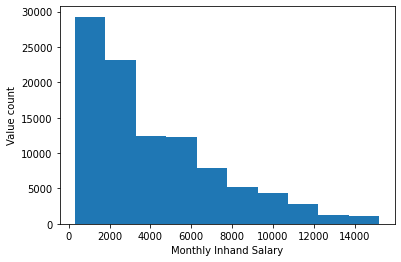

In [ ]:
plt.hist(credit_info['Monthly_Inhand_Salary'])
plt.xlabel('Monthly Inhand Salary')
plt.ylabel('Value count')
plt.show()

All done with Monthly Inhand Salary

## Num Bank Accounts

Check values

In [ ]:
credit_info['Num_Bank_Accounts'].describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

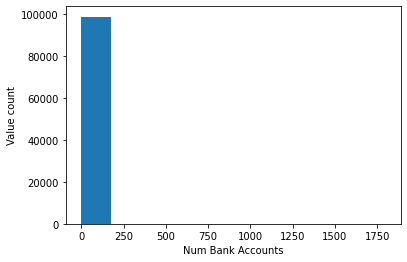

In [ ]:
plt.hist(credit_info['Num_Bank_Accounts'])
plt.xlabel('Num Bank Accounts')
plt.ylabel('Value count')
plt.show()

There are values that have to be fixed: negatives and thousands

Check which stat method use to change those wrong values

In [ ]:
credit_info.groupby(['Customer_ID'])['Num_Bank_Accounts'].agg(['min','max','median','mean',pd.Series.mode])

min  max  median  mean mode
Customer_ID                             
CUS_0x1000     6    6     6.0   6.0    6
CUS_0x1009     6    6     6.0   6.0    6
CUS_0x100b     1    1     1.0   1.0    1
CUS_0x1011     3    3     3.0   3.0    3
CUS_0x1013     3    3     3.0   3.0    3
...          ...  ...     ...   ...  ...
CUS_0xff3      0    0     0.0   0.0    0
CUS_0xff4      8    8     8.0   8.0    8
CUS_0xff6      5    5     5.0   5.0    5
CUS_0xffc      6    6     6.0   6.0    6
CUS_0xffd      8    8     8.0   8.0    8

[12500 rows x 5 columns]

Can't use min because there are negatives values.

Can't use max because the over thousands values.

Median, Mean and Mode seem to be the same. I will use Median in this case.

In [ ]:
credit_info['Num_Bank_Accounts'] = credit_info.groupby(by=['Customer_ID'])['Num_Bank_Accounts'].transform('median')

Check if issues were solved

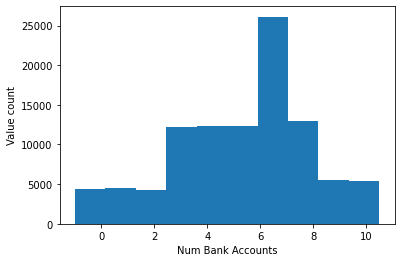

In [ ]:
plt.hist(credit_info['Num_Bank_Accounts'])
plt.xlabel('Num Bank Accounts')
plt.ylabel('Value count')
plt.show()

In [ ]:
credit_info['Num_Bank_Accounts'].describe()

count    100000.000000
mean          5.369600
std           2.592987
min          -1.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          10.500000
Name: Num_Bank_Accounts, dtype: float64

Thousand values were corrected.

Now, I will fix the negative ones.

In [ ]:
print(credit_info[['Customer_ID','Num_Bank_Accounts']][credit_info['Num_Bank_Accounts'] < 0])
print()
print('Value counts =',credit_info[['Customer_ID','Num_Bank_Accounts']][credit_info['Num_Bank_Accounts'] < 0].value_counts().sum())

      Customer_ID  Num_Bank_Accounts
30328  CUS_0x4f2a               -1.0
30329  CUS_0x4f2a               -1.0
30330  CUS_0x4f2a               -1.0
30331  CUS_0x4f2a               -1.0
30332  CUS_0x4f2a               -1.0
30333  CUS_0x4f2a               -1.0
30334  CUS_0x4f2a               -1.0
30335  CUS_0x4f2a               -1.0
43688  CUS_0xa878               -1.0
43689  CUS_0xa878               -1.0
43690  CUS_0xa878               -1.0
43691  CUS_0xa878               -1.0
43692  CUS_0xa878               -1.0
43693  CUS_0xa878               -1.0
43694  CUS_0xa878               -1.0
43695  CUS_0xa878               -1.0
47208  CUS_0x43bc               -0.5
47209  CUS_0x43bc               -0.5
47210  CUS_0x43bc               -0.5
47211  CUS_0x43bc               -0.5
47212  CUS_0x43bc               -0.5
47213  CUS_0x43bc               -0.5
47214  CUS_0x43bc               -0.5
47215  CUS_0x43bc               -0.5
55632  CUS_0x5993               -0.5
55633  CUS_0x5993               -0.5
5

Change negatives for 0s because there are not negatives number of accounts

In [ ]:
for i in credit_info['Num_Bank_Accounts']:
  if i < 0:
    credit_info['Num_Bank_Accounts'] = credit_info['Num_Bank_Accounts'].replace(i, 0)

Check if changes were done correctly

In [ ]:
credit_info['Num_Bank_Accounts'].describe()

count    100000.000000
mean          5.369840
std           2.592452
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          10.500000
Name: Num_Bank_Accounts, dtype: float64

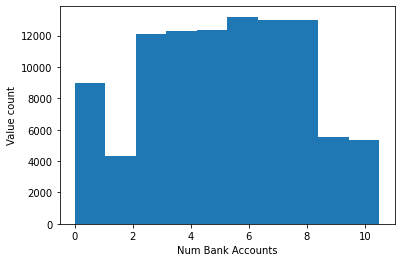

In [ ]:
plt.hist(credit_info['Num_Bank_Accounts'])
plt.xlabel('Num Bank Accounts')
plt.ylabel('Value count')
plt.show()

All done for Num Bank Accounts

## Num Credit Card

In [ ]:
credit_info['Num_Credit_Card'].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

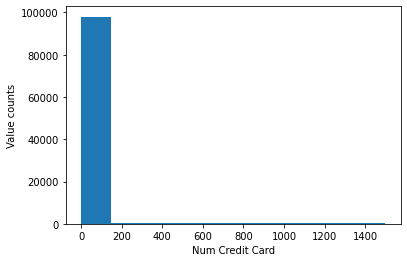

In [ ]:
plt.hist(credit_info['Num_Credit_Card'])
plt.xlabel('Num Credit Card')
plt.ylabel('Value counts')
plt.show()

There are thousands values that have to be fixed 

Check which stat method use to change those wrong values

In [ ]:
credit_info.groupby(['Customer_ID'])['Num_Credit_Card'].agg(['min','max','median','mean',pd.Series.mode])

min   max  median     mean mode
Customer_ID                                 
CUS_0x1000     5     5     5.0    5.000    5
CUS_0x1009     5     5     5.0    5.000    5
CUS_0x100b     4     4     4.0    4.000    4
CUS_0x1011     3     3     3.0    3.000    3
CUS_0x1013     3     3     3.0    3.000    3
...          ...   ...     ...      ...  ...
CUS_0xff3      6  1168     6.0  195.875    6
CUS_0xff4      7     7     7.0    7.000    7
CUS_0xff6      6     6     6.0    6.000    6
CUS_0xffc      8     8     8.0    8.000    8
CUS_0xffd      7     7     7.0    7.000    7

[12500 rows x 5 columns]

Can't use min because there are some 0 values.

Can't use max ore mean because there are over thousands values.


Median and Mode seem to be the same. I will use Median in this case.

In [ ]:
credit_info['Num_Credit_Card'] = credit_info.groupby(by=['Customer_ID'])['Num_Credit_Card'].transform('median')

In [ ]:
credit_info['Num_Credit_Card'].describe()

count    100000.000000
mean          5.534640
std           2.066834
min           0.500000
25%           4.000000
50%           5.000000
75%           7.000000
max          11.000000
Name: Num_Credit_Card, dtype: float64

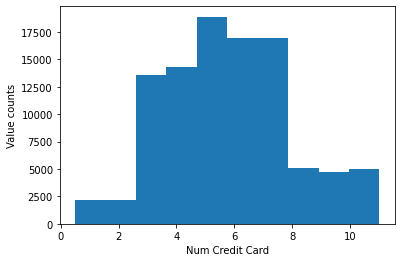

In [ ]:
plt.hist(credit_info['Num_Credit_Card'])
plt.xlabel('Num Credit Card')
plt.ylabel('Value counts')
plt.show()

All done for Num Credit Card

## Interest Rate

In [ ]:
credit_info['Interest_Rate'].describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

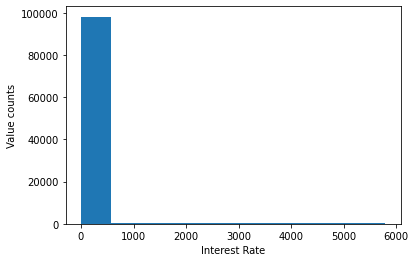

In [ ]:
plt.hist(credit_info['Interest_Rate'])
plt.xlabel('Interest Rate')
plt.ylabel('Value counts')
plt.show()

There are values that have to be fixed: thousands

Check which stat method use to change those wrong values

In [ ]:
credit_info.groupby(['Customer_ID'])['Interest_Rate'].agg(['min','max','median','mean',pd.Series.mode])

min   max  median    mean  mode
Customer_ID                                 
CUS_0x1000    27    27    27.0   27.00    27
CUS_0x1009    17    17    17.0   17.00    17
CUS_0x100b     1     1     1.0    1.00     1
CUS_0x1011    17    17    17.0   17.00    17
CUS_0x1013     6     6     6.0    6.00     6
...          ...   ...     ...     ...   ...
CUS_0xff3      2  3808     2.0  477.75     2
CUS_0xff4     14    14    14.0   14.00    14
CUS_0xff6      1     1     1.0    1.00     1
CUS_0xffc     27    27    27.0   27.00    27
CUS_0xffd     13    13    13.0   13.00    13

[12500 rows x 5 columns]

Can't use min because the Interest Rate could increased on the following month.

Can't use max ore mean because there are over thousands values.

Median and Mode seem to be the same. I will use Median in this case.

In [ ]:
credit_info['Interest_Rate'] = credit_info.groupby(by=['Customer_ID'])['Interest_Rate'].transform('median')

In [ ]:
credit_info['Interest_Rate'].describe()

count    100000.00000
mean         14.53208
std           8.74133
min           1.00000
25%           7.00000
50%          13.00000
75%          20.00000
max          34.00000
Name: Interest_Rate, dtype: float64

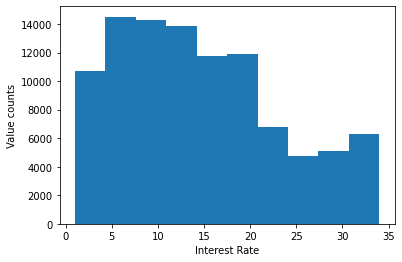

In [ ]:
plt.hist(credit_info['Interest_Rate'])
plt.xlabel('Interest Rate')
plt.ylabel('Value counts')
plt.show()

All done for Interest Rate

## Num of Loan

In [ ]:
credit_info['Num_of_Loan'].describe()

count     100000
unique       434
top            3
freq       14386
Name: Num_of_Loan, dtype: object

In [ ]:
credit_info['Num_of_Loan'].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

Fix the values that have "_"

In [ ]:
credit_info['Num_of_Loan'] = credit_info['Num_of_Loan'].str.strip('_')

Convert to float

In [ ]:
credit_info['Num_of_Loan'] = credit_info['Num_of_Loan'].astype('float')

In [ ]:
credit_info['Num_of_Loan'].describe()

count    100000.000000
mean          3.009960
std          62.647879
min        -100.000000
25%           1.000000
50%           3.000000
75%           5.000000
max        1496.000000
Name: Num_of_Loan, dtype: float64

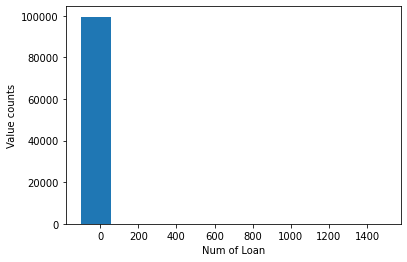

In [ ]:
plt.hist(credit_info['Num_of_Loan'])
plt.xlabel('Num of Loan')
plt.ylabel('Value counts')
plt.show()

There are values that have to be fixed: negatives and thousands

Convert negatives to Na

In [ ]:
for i in credit_info['Num_of_Loan']:
  if i < 0:
    credit_info['Num_of_Loan'] = credit_info['Num_of_Loan'].replace(i, np.nan)

Check min, max, median, mean, mode for each customer to see which is the best stats to change Na's and thousands

In [ ]:
credit_info.groupby(['Customer_ID'])['Num_of_Loan'].agg(['min','max','median','mean',pd.Series.mode])

min     max  median    mean  mode
Customer_ID                                   
CUS_0x1000   2.0     2.0     2.0    2.00   2.0
CUS_0x1009   4.0  1094.0     4.0  140.25   4.0
CUS_0x100b   0.0     0.0     0.0    0.00   0.0
CUS_0x1011   3.0     3.0     3.0    3.00   3.0
CUS_0x1013   3.0     3.0     3.0    3.00   3.0
...          ...     ...     ...     ...   ...
CUS_0xff3    3.0     3.0     3.0    3.00   3.0
CUS_0xff4    5.0     5.0     5.0    5.00   5.0
CUS_0xff6    2.0     2.0     2.0    2.00   2.0
CUS_0xffc    8.0     8.0     8.0    8.00   8.0
CUS_0xffd    6.0     6.0     6.0    6.00   6.0

[12500 rows x 5 columns]

I will use Mode for Na's and Median for the thousands values

In [ ]:
credit_info['Num_of_Loan'] = credit_info.groupby('Customer_ID')['Num_of_Loan'].transform(lambda x: x.fillna(stats.mode(x)[0][0]))

In [ ]:
credit_info['Num_of_Loan'] = credit_info.groupby(by=['Customer_ID'])['Num_of_Loan'].transform('median')

In [ ]:
credit_info['Num_of_Loan'].describe()

count    100000.000000
mean          3.532880
std           2.446356
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           9.000000
Name: Num_of_Loan, dtype: float64

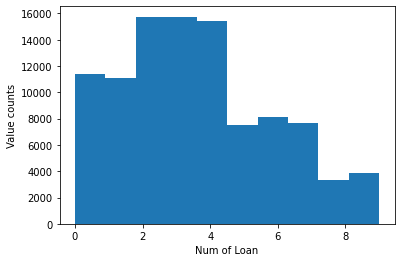

In [ ]:
plt.hist(credit_info['Num_of_Loan'])
plt.xlabel('Num of Loan')
plt.ylabel('Value counts')
plt.show()

All done with Num_of_Loan

## Type of Loan

In [ ]:
credit_info['Type_of_Loan'].describe()

count             88592
unique             6260
top       Not Specified
freq               1408
Name: Type_of_Loan, dtype: object

In [ ]:
credit_info['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

There is another column called 'Num_of_Loan' that counts how many Type of Loans are for each customer. 

I am going to delete this columns because I find 'Num_of_Loan' more usefull.

In [ ]:
credit_info.drop(columns='Type_of_Loan', inplace = True)

All done with Counts_of_Loans

## Delay from due date

In [ ]:
credit_info['Delay_from_due_date'].describe()

count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

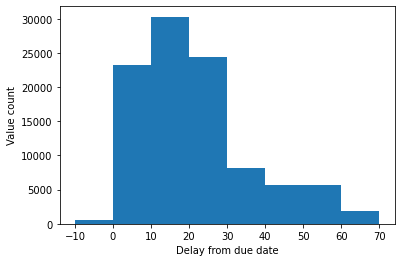

In [ ]:
plt.hist(credit_info['Delay_from_due_date'], bins = [-10, 0, 10, 20, 30, 40, 50, 60, 70])
plt.xlabel('Delay from due date')
plt.ylabel('Value count')
plt.show()

Assumption = Negatives values could means number of days paid in advance

All done with Delay_from_due_date

## Num of Delayed Payment

In [ ]:
credit_info['Num_of_Delayed_Payment'].describe()

count     92998
unique      749
top          19
freq       5327
Name: Num_of_Delayed_Payment, dtype: object

In [ ]:
credit_info['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [ ]:
credit_info[['Customer_ID','Num_of_Delayed_Payment']].head(24)

Customer_ID Num_of_Delayed_Payment
0    CUS_0xd40                      7
1    CUS_0xd40                    NaN
2    CUS_0xd40                      7
3    CUS_0xd40                      4
4    CUS_0xd40                    NaN
5    CUS_0xd40                      4
6    CUS_0xd40                     8_
7    CUS_0xd40                      6
8   CUS_0x21b1                      4
9   CUS_0x21b1                      1
10  CUS_0x21b1                     -1
11  CUS_0x21b1                     3_
12  CUS_0x21b1                      1
13  CUS_0x21b1                      0
14  CUS_0x21b1                      4
15  CUS_0x21b1                      4
16  CUS_0x2dbc                      8
17  CUS_0x2dbc                      6
18  CUS_0x2dbc                      7
19  CUS_0x2dbc                      5
20  CUS_0x2dbc                      5
21  CUS_0x2dbc                      6
22  CUS_0x2dbc                      6
23  CUS_0x2dbc                      6

There are "_",  negatives, and Na values

First: fix the values that have "_"

In [ ]:
credit_info['Num_of_Delayed_Payment'] = credit_info['Num_of_Delayed_Payment'].str.strip('_')

Convert to float

In [ ]:
credit_info['Num_of_Delayed_Payment'] = credit_info['Num_of_Delayed_Payment'].astype('float')

Plot values to check distribution

In [ ]:
credit_info['Num_of_Delayed_Payment'].describe()

count    92998.000000
mean        30.923342
std        226.031892
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

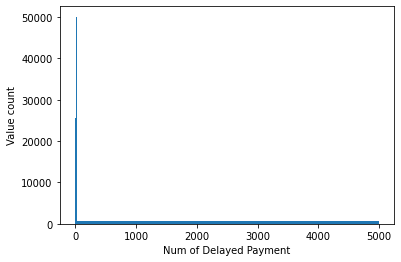

In [ ]:
plt.hist(credit_info['Num_of_Delayed_Payment'], bins = [-10, 0, 10, 20, 30, 5000])
plt.xlabel('Num of Delayed Payment')
plt.ylabel('Value count')
plt.show()

Check if there are wrong values

In [ ]:
credit_info[['Customer_ID','Num_of_Delayed_Payment']][credit_info['Num_of_Delayed_Payment'] > 1000]

Customer_ID  Num_of_Delayed_Payment
252    CUS_0x6048                  3318.0
284    CUS_0x9b94                  3083.0
304    CUS_0x42ac                  1338.0
409    CUS_0xb986                  3104.0
706    CUS_0x4af0                  1106.0
...           ...                     ...
99069  CUS_0xc429                  2385.0
99133  CUS_0xbb53                  3336.0
99402  CUS_0x7b65                  3392.0
99562   CUS_0x650                  3688.0
99825  CUS_0x2c0a                  2047.0

[581 rows x 2 columns]

In [ ]:
credit_info[['Customer_ID','Num_of_Delayed_Payment']][credit_info['Customer_ID'] == 'CUS_0x6048']

Customer_ID  Num_of_Delayed_Payment
248  CUS_0x6048                    21.0
249  CUS_0x6048                    21.0
250  CUS_0x6048                    21.0
251  CUS_0x6048                    22.0
252  CUS_0x6048                  3318.0
253  CUS_0x6048                    21.0
254  CUS_0x6048                    21.0
255  CUS_0x6048                    18.0

There are wrong values

Second: change negatives values to Na's

In [ ]:
for i in credit_info['Num_of_Delayed_Payment']:
  if i < 0:
    credit_info['Num_of_Delayed_Payment'] = credit_info['Num_of_Delayed_Payment'].replace(i, np.nan)

Third: change Na values and wrong values

In [ ]:
credit_info.groupby(['Customer_ID'])['Num_of_Delayed_Payment'].agg(['min','max','median','mean',pd.Series.mode])

min     max  median        mean          mode
Customer_ID                                                
CUS_0x1000   23.0    28.0    25.0   25.000000          25.0
CUS_0x1009   16.0  1749.0    18.0  234.250000          18.0
CUS_0x100b    7.0     9.0     7.0    7.375000           7.0
CUS_0x1011   12.0    17.0    15.0   14.500000          15.0
CUS_0x1013    7.0     9.0     9.0    8.428571           9.0
...           ...     ...     ...         ...           ...
CUS_0xff3     6.0    11.0     9.0    8.625000           9.0
CUS_0xff4    10.0    14.0    13.0   12.125000  [10.0, 13.0]
CUS_0xff6     2.0     7.0     4.0    4.000000           4.0
CUS_0xffc    14.0    19.0    16.0   16.250000          16.0
CUS_0xffd     9.0    12.0    12.0   11.428571          12.0

[12500 rows x 5 columns]

I will use Median. There are Mode values that are lists.

In [ ]:
credit_info['Num_of_Delayed_Payment'] = credit_info.groupby(by=['Customer_ID'])['Num_of_Delayed_Payment'].transform('median')

In [ ]:
credit_info['Num_of_Delayed_Payment'].describe()

count    100000.000000
mean         13.320960
std           6.182172
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max          26.500000
Name: Num_of_Delayed_Payment, dtype: float64

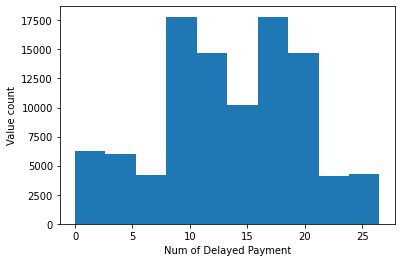

In [ ]:
plt.hist(credit_info['Num_of_Delayed_Payment'])
plt.xlabel('Num of Delayed Payment')
plt.ylabel('Value count')
plt.show()

All done with Num of Delayed Payment

## Changed Credit Limit

In [ ]:
credit_info['Changed_Credit_Limit'].describe()

count     100000
unique      3635
top            _
freq        2091
Name: Changed_Credit_Limit, dtype: object

In [ ]:
credit_info['Changed_Credit_Limit'].unique()

array(['11.27', '_', '6.27', ..., '27.38', '25.16', '21.17'], dtype=object)

Delete "_" from values

In [ ]:
credit_info['Changed_Credit_Limit'] = credit_info['Changed_Credit_Limit'].str.strip('_')

In [ ]:
credit_info['Changed_Credit_Limit'].unique()

array(['11.27', '', '6.27', ..., '27.38', '25.16', '21.17'], dtype=object)

Change empty values for Nas

In [ ]:
for i in credit_info['Changed_Credit_Limit']:
  if i == '':
    credit_info['Changed_Credit_Limit'] = credit_info['Changed_Credit_Limit'].replace(i, np.nan)

Convert Changed_Credit_Limit type to float

In [ ]:
credit_info['Changed_Credit_Limit'] = credit_info['Changed_Credit_Limit'].astype('float')

Plot values to check distribution

In [ ]:
credit_info['Changed_Credit_Limit'].describe()

count    97909.000000
mean        10.389025
std          6.789496
min         -6.490000
25%          5.320000
50%          9.400000
75%         14.870000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64

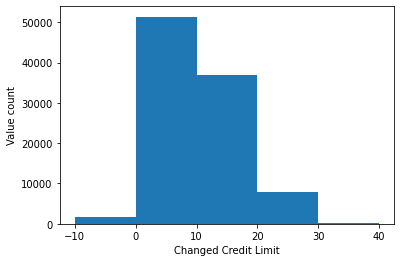

In [ ]:
plt.hist(credit_info['Changed_Credit_Limit'], bins = [-10, 0, 10, 20, 30, 40])
plt.xlabel('Changed Credit Limit')
plt.ylabel('Value count')
plt.show()

Change negatives for Nas

In [ ]:
for i in credit_info['Changed_Credit_Limit']:
  if i < 0:
    credit_info['Changed_Credit_Limit'] = credit_info['Changed_Credit_Limit'].replace(i, np.nan)

Check which stat use to replace the Nas

In [ ]:
credit_info.groupby(['Customer_ID'])['Changed_Credit_Limit'].agg(['min','max','median','mean',pd.Series.mode])

min    max  median       mean   mode
Customer_ID                                        
CUS_0x1000    1.63   2.63    1.63   1.880000   1.63
CUS_0x1009    9.73   9.73    9.73   9.730000   9.73
CUS_0x100b    8.34  11.34   11.34  10.911429  11.34
CUS_0x1011   13.42  14.42   14.42  14.170000  14.42
CUS_0x1013    1.33   4.33    1.33   1.705000   1.33
...            ...    ...     ...        ...    ...
CUS_0xff3     6.86  13.86    6.86   8.485000   6.86
CUS_0xff4     7.83  10.83    7.83   8.205000   7.83
CUS_0xff6    10.40  16.40   10.40  11.900000   10.4
CUS_0xffc     5.82  12.82    8.82   8.820000   8.82
CUS_0xffd    10.07  12.07   10.07  10.320000  10.07

[12500 rows x 5 columns]

Change Nas with Mode

In [ ]:
credit_info['Changed_Credit_Limit'] = credit_info.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda x: x.fillna(stats.mode(x)[0][0]))

Check if all Nas where fixed

In [ ]:
credit_info['Changed_Credit_Limit'].describe()

count    99982.000000
mean        10.473497
std          6.657536
min          0.000000
25%          5.370000
50%          9.400000
75%         14.850000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64

In [ ]:
credit_info['Changed_Credit_Limit'].isna().sum()

18

There are still 18 Na values

In [ ]:
credit_info[['Customer_ID','Changed_Credit_Limit']][credit_info['Changed_Credit_Limit'].isna() == True]

Customer_ID  Changed_Credit_Limit
2888   CUS_0x3f27                   NaN
2891   CUS_0x3f27                   NaN
2892   CUS_0x3f27                   NaN
51672   CUS_0x663                   NaN
51674   CUS_0x663                   NaN
51676   CUS_0x663                   NaN
51677   CUS_0x663                   NaN
57587  CUS_0xc41f                   NaN
57588  CUS_0xc41f                   NaN
57590  CUS_0xc41f                   NaN
61337  CUS_0xb5e9                   NaN
61340  CUS_0xb5e9                   NaN
61341  CUS_0xb5e9                   NaN
61342  CUS_0xb5e9                   NaN
89361  CUS_0xa857                   NaN
89362  CUS_0xa857                   NaN
89364  CUS_0xa857                   NaN
89365  CUS_0xa857                   NaN

In [ ]:
credit_info['Customer_ID'][credit_info['Changed_Credit_Limit'].isna() == True].unique()

array(['CUS_0x3f27', 'CUS_0x663', 'CUS_0xc41f', 'CUS_0xb5e9',
       'CUS_0xa857'], dtype=object)

In [ ]:
print(credit_info[['Customer_ID','Changed_Credit_Limit']][credit_info['Customer_ID'] == 'CUS_0x3f27'])
print(credit_info[['Customer_ID','Changed_Credit_Limit']][credit_info['Customer_ID'] == 'CUS_0x663'])
print(credit_info[['Customer_ID','Changed_Credit_Limit']][credit_info['Customer_ID'] == 'CUS_0xc41f'])
print(credit_info[['Customer_ID','Changed_Credit_Limit']][credit_info['Customer_ID'] == 'CUS_0xb5e9'])
print(credit_info[['Customer_ID','Changed_Credit_Limit']][credit_info['Customer_ID'] == 'CUS_0xa857'])

     Customer_ID  Changed_Credit_Limit
2888  CUS_0x3f27                   NaN
2889  CUS_0x3f27                   4.2
2890  CUS_0x3f27                   5.2
2891  CUS_0x3f27                   NaN
2892  CUS_0x3f27                   NaN
2893  CUS_0x3f27                  10.2
2894  CUS_0x3f27                   1.2
2895  CUS_0x3f27                   5.2
      Customer_ID  Changed_Credit_Limit
51672   CUS_0x663                   NaN
51673   CUS_0x663                  1.69
51674   CUS_0x663                   NaN
51675   CUS_0x663                  1.69
51676   CUS_0x663                   NaN
51677   CUS_0x663                   NaN
51678   CUS_0x663                  3.69
51679   CUS_0x663                  1.69
      Customer_ID  Changed_Credit_Limit
57584  CUS_0xc41f                  7.99
57585  CUS_0xc41f                  2.99
57586  CUS_0xc41f                  1.99
57587  CUS_0xc41f                   NaN
57588  CUS_0xc41f                   NaN
57589  CUS_0xc41f                  5.99
57590  CU

Those Na did not change because the mode for each of those customers was Na.

I will change it to median.

In [ ]:
credit_info['Changed_Credit_Limit'] = credit_info.groupby('Customer_ID')['Changed_Credit_Limit'].transform('median')

Check if all Nas where fixed

In [ ]:
credit_info['Changed_Credit_Limit'].describe()

count    100000.000000
mean         10.397183
std           6.508729
min           0.500000
25%           5.500000
50%           9.350000
75%          14.662500
max          29.980000
Name: Changed_Credit_Limit, dtype: float64

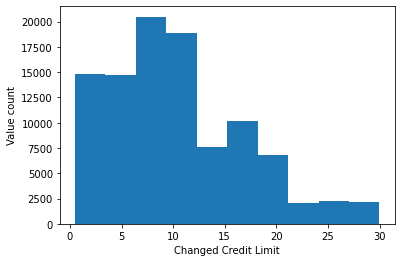

In [ ]:
plt.hist(credit_info['Changed_Credit_Limit'])
plt.xlabel('Changed Credit Limit')
plt.ylabel('Value count')
plt.show()

All done with Changed Credit Limit

## Num Credit Inquiries

In [ ]:
credit_info['Num_Credit_Inquiries'].describe()

count    98035.000000
mean        27.754251
std        193.177339
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2597.000000
Name: Num_Credit_Inquiries, dtype: float64

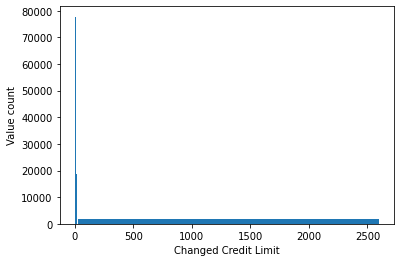

In [ ]:
plt.hist(credit_info['Num_Credit_Inquiries'], bins = [0, 10, 20, 30, 2600])
plt.xlabel('Changed Credit Limit')
plt.ylabel('Value count')
plt.show()

There seemed to be wrong values and Nas

Check which stat use to replace the outliers and Nas

In [ ]:
credit_info.groupby(['Customer_ID'])['Num_Credit_Inquiries'].agg(['min','max','median','mean',pd.Series.mode])

min     max  median        mean        mode
Customer_ID                                              
CUS_0x1000   10.0    11.0    11.0   10.875000        11.0
CUS_0x1009    2.0     4.0     3.0    3.000000  [2.0, 4.0]
CUS_0x100b    1.0  2271.0     1.0  285.500000         1.0
CUS_0x1011    7.0  1965.0     7.0  251.750000         7.0
CUS_0x1013    3.0     3.0     3.0    3.000000         3.0
...           ...     ...     ...         ...         ...
CUS_0xff3     3.0     5.0     5.0    4.250000         5.0
CUS_0xff4     5.0     5.0     5.0    5.000000         5.0
CUS_0xff6     2.0     2.0     2.0    2.000000         2.0
CUS_0xffc     8.0    13.0    13.0   12.375000        13.0
CUS_0xffd     7.0  1801.0     7.0  263.285714         7.0

[12500 rows x 5 columns]

I will use Median

In [ ]:
credit_info['Num_Credit_Inquiries'] = credit_info.groupby('Customer_ID')['Num_Credit_Inquiries'].transform('median')

Check if issues were fixed

In [ ]:
credit_info['Num_Credit_Inquiries'].describe()

count    100000.000000
mean          5.794600
std           3.831618
min           0.000000
25%           3.000000
50%           5.000000
75%           8.500000
max          17.000000
Name: Num_Credit_Inquiries, dtype: float64

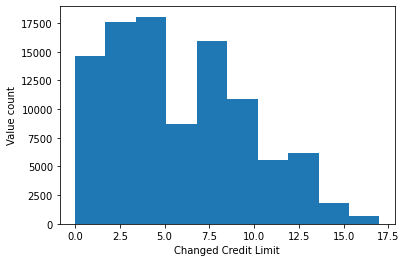

In [ ]:
plt.hist(credit_info['Num_Credit_Inquiries'])
plt.xlabel('Changed Credit Limit')
plt.ylabel('Value count')
plt.show()

All done with Num Credit Inquiries

## Credit Mix

In [ ]:
credit_info['Credit_Mix'].describe()

count       100000
unique           4
top       Standard
freq         36479
Name: Credit_Mix, dtype: object

In [ ]:
credit_info['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

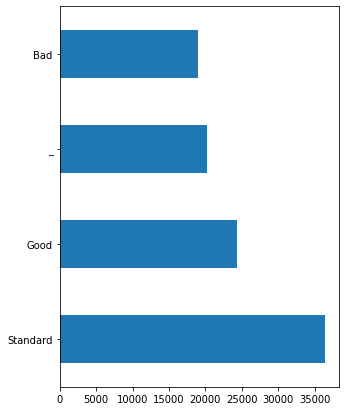

In [ ]:
credit_info['Credit_Mix'].value_counts().plot.barh(figsize = (5,7))

In [ ]:
credit_info['Credit_Mix'][credit_info['Credit_Mix'] == '_'].count()

20195

There is a incorrect value '_'

I am going to change it to Na

In [ ]:
for i in credit_info['Credit_Mix']:
  if i == '_':
    credit_info['Credit_Mix'] = credit_info['Credit_Mix'].replace(i, np.nan)

In [ ]:
credit_info[['Customer_ID','Credit_Mix']]

Customer_ID Credit_Mix
0       CUS_0xd40        NaN
1       CUS_0xd40       Good
2       CUS_0xd40       Good
3       CUS_0xd40       Good
4       CUS_0xd40       Good
...           ...        ...
99995  CUS_0x942c        NaN
99996  CUS_0x942c        NaN
99997  CUS_0x942c       Good
99998  CUS_0x942c       Good
99999  CUS_0x942c       Good

[100000 rows x 2 columns]

Now I will replace it for the Mode

In [ ]:
credit_info['Credit_Mix'] = credit_info.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.fillna(stats.mode(x)[0][0]))

In [ ]:
credit_info['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

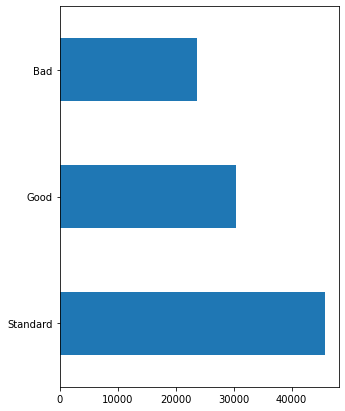

In [ ]:
credit_info['Credit_Mix'].value_counts().plot.barh(figsize = (5,7))

All done with Credit Mix

## Outstanding Debt

In [ ]:
credit_info['Outstanding_Debt'].describe()

count      100000
unique      13178
top       1360.45
freq           24
Name: Outstanding_Debt, dtype: object

In [ ]:
credit_info['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

Values with "_" have to be fixed

In [ ]:
credit_info['Outstanding_Debt'] = credit_info['Outstanding_Debt'].str.strip('_')

Change type to float

In [ ]:
credit_info['Outstanding_Debt'] = credit_info['Outstanding_Debt'].astype('float')

In [ ]:
credit_info['Outstanding_Debt'].describe()

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64

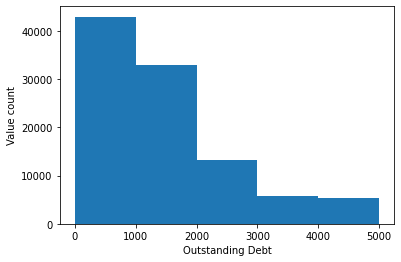

In [ ]:
plt.hist(credit_info['Outstanding_Debt'], bins = [0, 1000, 2000, 3000, 4000, 5000])
plt.xlabel('Outstanding Debt')
plt.ylabel('Value count')
plt.show()

All done with Outstanding Debt

## Credit Utilization Ratio

In [ ]:
credit_info['Credit_Utilization_Ratio'].describe()

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

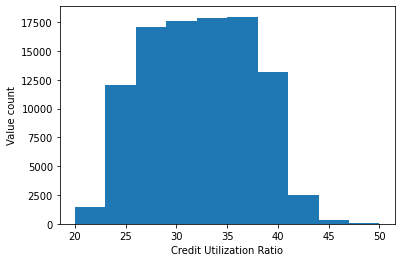

In [ ]:
plt.hist(credit_info['Credit_Utilization_Ratio'])
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Value count')
plt.show()

All correct with Credit Utilization Ratio

## Credit History Age

In [ ]:
credit_info['Credit_History_Age'].describe()

count                      90970
unique                       404
top       15 Years and 11 Months
freq                         446
Name: Credit_History_Age, dtype: object

In [ ]:
credit_info['Credit_History_Age'].isna().sum()

9030

In [ ]:
credit_info['Credit_History_Age'].head()

0    22 Years and 1 Months
1                      NaN
2    22 Years and 3 Months
3    22 Years and 4 Months
4    22 Years and 5 Months
Name: Credit_History_Age, dtype: object

Credit History Age formatted in "YY Years and MM Month".

I am only going to use the year for now.

In [ ]:
credit_hist_age = []
for i in credit_info['Credit_History_Age']:
    credit_hist_age.append(str(i).split(' ')[0])
    
credit_info['Credit_History_Age'] = credit_hist_age

In [ ]:
credit_info['Credit_History_Age'].head()

0     22
1    nan
2     22
3     22
4     22
Name: Credit_History_Age, dtype: object

In [ ]:
credit_info['Credit_History_Age'] = credit_info['Credit_History_Age'].astype('float')

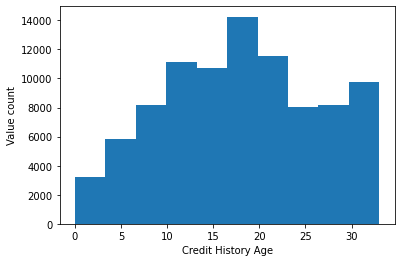

In [ ]:
plt.hist(credit_info['Credit_History_Age'])
plt.xlabel('Credit History Age')
plt.ylabel('Value count')
plt.show()

Now, fix the Na's

In [ ]:
credit_info.groupby(['Customer_ID'])['Credit_History_Age'].agg(['min','max','median','mean',pd.Series.mode])

min   max  median       mean  mode
Customer_ID                                     
CUS_0x1000   10.0  10.0    10.0  10.000000  10.0
CUS_0x1009   30.0  31.0    30.0  30.142857  30.0
CUS_0x100b   15.0  15.0    15.0  15.000000  15.0
CUS_0x1011   15.0  15.0    15.0  15.000000  15.0
CUS_0x1013   17.0  17.0    17.0  17.000000  17.0
...           ...   ...     ...        ...   ...
CUS_0xff3    16.0  17.0    17.0  16.571429  17.0
CUS_0xff4    18.0  18.0    18.0  18.000000  18.0
CUS_0xff6    24.0  24.0    24.0  24.000000  24.0
CUS_0xffc    12.0  13.0    12.0  12.333333  12.0
CUS_0xffd    18.0  18.0    18.0  18.000000  18.0

[12500 rows x 5 columns]

I will use de Mode to fill the Na's

In [ ]:
credit_info['Credit_History_Age'] = credit_info.groupby('Customer_ID')['Credit_History_Age'].transform(lambda x: x.fillna(stats.mode(x)[0][0]))

In [ ]:
credit_info['Credit_History_Age'].describe()

count    99898.000000
mean        17.968628
std          8.316716
min          0.000000
25%         12.000000
50%         18.000000
75%         25.000000
max         33.000000
Name: Credit_History_Age, dtype: float64

In [ ]:
credit_info['Credit_History_Age'].isna().sum()

102

There are 102 values that still Na.

Now, I will use the Max because the last entry, which is the oldest, is the most important.

In [ ]:
credit_info['Credit_History_Age'] = credit_info.groupby('Customer_ID')['Credit_History_Age'].transform('max')

In [ ]:
credit_info['Credit_History_Age'].describe()

count    100000.000000
mean         18.235920
std           8.313256
min           0.000000
25%          12.000000
50%          18.000000
75%          25.000000
max          33.000000
Name: Credit_History_Age, dtype: float64

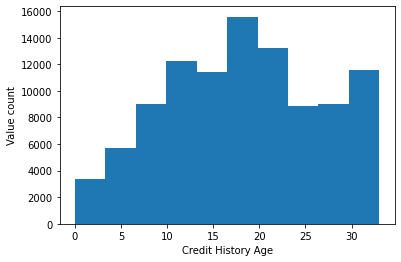

In [ ]:
plt.hist(credit_info['Credit_History_Age'])
plt.xlabel('Credit History Age')
plt.ylabel('Value count')
plt.show()

All done with Credit History Age

## Payment of Min Amount

In [ ]:
credit_info['Payment_of_Min_Amount'].describe()

count     100000
unique         3
top          Yes
freq       52326
Name: Payment_of_Min_Amount, dtype: object

In [ ]:
credit_info['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

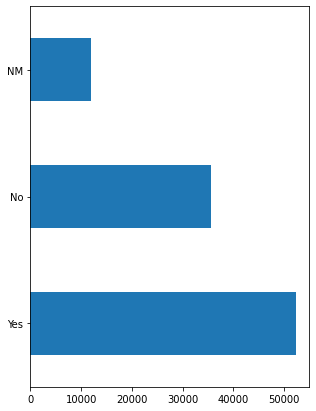

In [ ]:
credit_info['Payment_of_Min_Amount'].value_counts().plot.barh(figsize = (5,7))

In [ ]:
credit_info['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

This column should have the values of 'Yes' or 'Not', for that reason I will assume that 'NM' is an incorrect value.

I will 'NM' values to Na

In [ ]:
for i in credit_info['Payment_of_Min_Amount']:
  if i == 'NM':
    credit_info['Payment_of_Min_Amount'] = credit_info['Payment_of_Min_Amount'].replace(i, np.nan)

I will change the Na for the Mode

In [ ]:
credit_info['Payment_of_Min_Amount'] = credit_info.groupby('Customer_ID')['Payment_of_Min_Amount'].transform(lambda x: x.fillna(stats.mode(x)[0][0]))

In [ ]:
credit_info['Payment_of_Min_Amount'].describe()

count     100000
unique         2
top          Yes
freq       59432
Name: Payment_of_Min_Amount, dtype: object

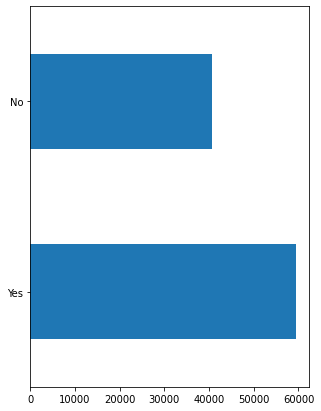

In [ ]:
credit_info['Payment_of_Min_Amount'].value_counts().plot.barh(figsize = (5,7))

In [ ]:
credit_info['Payment_of_Min_Amount'].value_counts()

Yes    59432
No     40568
Name: Payment_of_Min_Amount, dtype: int64

All done with Payment of Min Amount

## Total EMI per month

In [ ]:
credit_info['Total_EMI_per_month'].describe()

count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: Total_EMI_per_month, dtype: float64

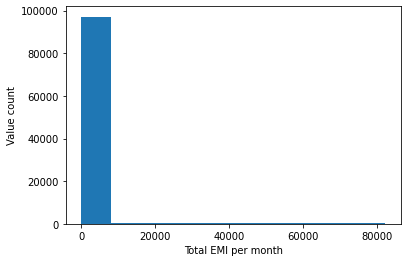

In [ ]:
plt.hist(credit_info['Total_EMI_per_month'])
plt.xlabel('Total EMI per month')
plt.ylabel('Value count')
plt.show()

It seems to be some outliers.

I will fix them with the Median

In [ ]:
credit_info['Total_EMI_per_month'] = credit_info.groupby(by=['Customer_ID'])['Total_EMI_per_month'].transform('median')

In [ ]:
credit_info['Total_EMI_per_month'].describe()

count    100000.000000
mean        109.924806
std         236.225101
min           0.000000
25%          29.524253
50%          66.915017
75%         148.099519
max       21627.117104
Name: Total_EMI_per_month, dtype: float64

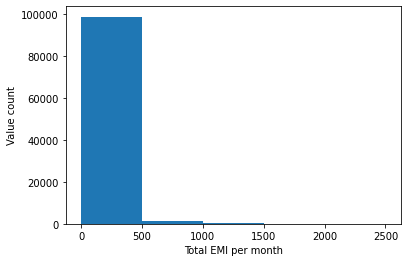

In [ ]:
plt.hist(credit_info['Total_EMI_per_month'], bins = [0, 500, 1000, 1500, 2000, 2500])
plt.xlabel('Total EMI per month')
plt.ylabel('Value count')
plt.show()

All done with Total EMI per month

## Amount invested monthly

In [ ]:
credit_info['Amount_invested_monthly'].describe()

count         95521
unique        91049
top       __10000__
freq           4305
Name: Amount_invested_monthly, dtype: object

In [ ]:
credit_info['Amount_invested_monthly'].isna().sum()

4479

The value "__ 10000 __" is incorrect. I will replace it for Nas

In [ ]:
for i in credit_info['Amount_invested_monthly']:
  if i == '__10000__':
    credit_info['Amount_invested_monthly'] = credit_info['Amount_invested_monthly'].replace(i, np.nan)

In [ ]:
credit_info['Amount_invested_monthly'] = credit_info['Amount_invested_monthly'].astype('float')

In [ ]:
credit_info['Amount_invested_monthly'].isna().sum()

8784

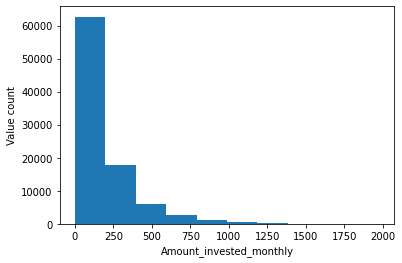

In [ ]:
plt.hist(credit_info['Amount_invested_monthly'])
plt.xlabel('Amount_invested_monthly')
plt.ylabel('Value count')
plt.show()

Fill Na with the mode

In [ ]:
credit_info['Amount_invested_monthly'] = credit_info.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.fillna(stats.mode(x)[0][0]))

In [ ]:
credit_info['Amount_invested_monthly'].describe()

count    95785.000000
mean       189.350585
std        196.996558
min          0.000000
25%         68.307571
50%        123.823936
75%        228.445627
max       1977.326102
Name: Amount_invested_monthly, dtype: float64

In [ ]:
credit_info['Amount_invested_monthly'].isna().sum()

4215

There are still NAs, I will fill them with the Median now

In [ ]:
credit_info['Amount_invested_monthly'] = credit_info.groupby('Customer_ID')['Amount_invested_monthly'].transform('median')

In [ ]:
credit_info['Amount_invested_monthly'].describe()

count    100000.000000
mean        163.912217
std         119.710996
min           5.755238
25%          84.634907
50%         127.488228
75%         206.565327
max        1132.669634
Name: Amount_invested_monthly, dtype: float64

In [ ]:
credit_info['Amount_invested_monthly'].isna().sum()

0

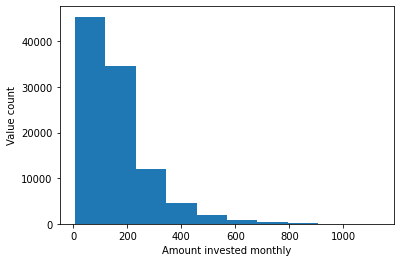

In [ ]:
plt.hist(credit_info['Amount_invested_monthly'])
plt.xlabel('Amount invested monthly')
plt.ylabel('Value count')
plt.show()

All done with Amount_invested_monthly

## Payment Behaviour

In [ ]:
credit_info['Payment_Behaviour'].describe()

count                             100000
unique                                 7
top       Low_spent_Small_value_payments
freq                               25513
Name: Payment_Behaviour, dtype: object

In [ ]:
credit_info['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

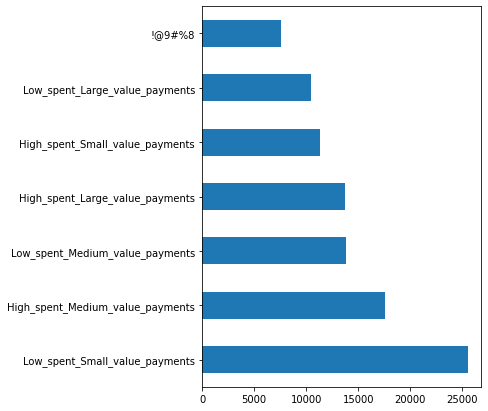

In [ ]:
credit_info['Payment_Behaviour'].value_counts().plot.barh(figsize = (5,7))

Fix the '!@9#%8' values with the Mode

In [ ]:
for i in credit_info['Payment_Behaviour']:
  if i == '!@9#%8':
    credit_info['Payment_Behaviour'] = credit_info['Payment_Behaviour'].replace(i,np.nan)

In [ ]:
credit_info['Payment_Behaviour'] = credit_info.groupby('Customer_ID')['Payment_Behaviour'].transform(lambda x: x.fillna(stats.mode(x)[0][0]))

In [ ]:
credit_info['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [ ]:
credit_info['Payment_Behaviour'].isna().sum()

0

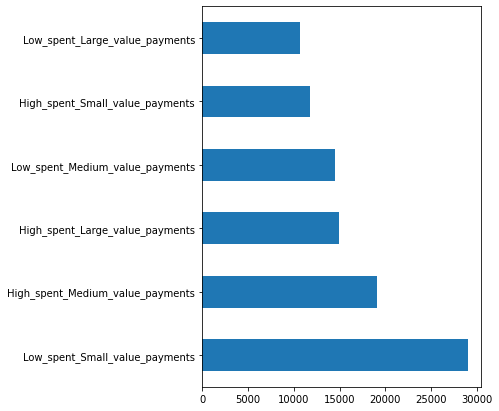

In [ ]:
credit_info['Payment_Behaviour'].value_counts().plot.barh(figsize = (5,7))

All done with Payment Behaviour

## Monthly Balance

In [ ]:
credit_info['Monthly_Balance'].describe()

count                                98800
unique                               98790
top       __-333333333333333333333333333__
freq                                     9
Name: Monthly_Balance, dtype: object

In [ ]:
credit_info['Monthly_Balance'].unique()

array(['312.4940887', '284.6291625', '331.2098629', ..., 516.8090833,
       319.1649785, 393.6736956], dtype=object)

Change '__ -333333333333333333333333333 __' value for Nas

In [ ]:
for i in credit_info['Monthly_Balance']:
  if i == '__-333333333333333333333333333__': 
    credit_info['Monthly_Balance'] = credit_info['Monthly_Balance'].replace(i,np.nan)

Convert to float

In [ ]:
credit_info['Monthly_Balance'] = credit_info['Monthly_Balance'].astype('float')

In [ ]:
credit_info['Monthly_Balance'].describe()

count    98791.000000
mean       402.551258
std        213.925499
min          0.007760
25%        270.106630
50%        336.731225
75%        470.262938
max       1602.040519
Name: Monthly_Balance, dtype: float64

In [ ]:
credit_info['Monthly_Balance'].isna().sum()

1209

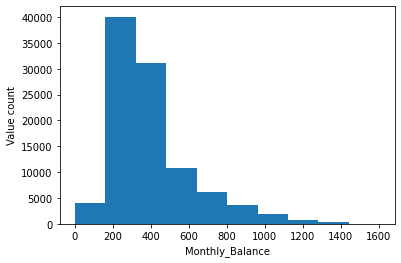

In [ ]:
plt.hist(credit_info['Monthly_Balance'])
plt.xlabel('Monthly_Balance')
plt.ylabel('Value count')
plt.show()

Change Nas with the Mode

In [ ]:
credit_info['Monthly_Balance'] = credit_info.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.fillna(stats.mode(x)[0][0]))

In [ ]:
credit_info['Monthly_Balance'].describe()

count    99567.000000
mean       401.081266
std        214.289243
min          0.007760
25%        269.262844
50%        336.005129
75%        469.150336
max       1602.040519
Name: Monthly_Balance, dtype: float64

In [ ]:
credit_info['Monthly_Balance'].isna().sum()

433

Change Nas with the Median

In [ ]:
credit_info['Monthly_Balance'] = credit_info.groupby('Customer_ID')['Monthly_Balance'].transform('median')

In [ ]:
credit_info['Monthly_Balance'].describe()

count    100000.000000
mean        422.468180
std         193.919084
min          77.477458
25%         289.696792
50%         352.420231
75%         491.641181
max        1427.797464
Name: Monthly_Balance, dtype: float64

In [ ]:
credit_info['Monthly_Balance'].isna().sum()

0

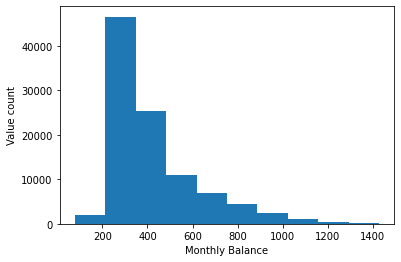

In [ ]:
plt.hist(credit_info['Monthly_Balance'])
plt.xlabel('Monthly Balance')
plt.ylabel('Value count')
plt.show()

All done with Monthly_Balance

## Credit Score

In [ ]:
credit_info['Credit_Score'].describe()

count       100000
unique           3
top       Standard
freq         53174
Name: Credit_Score, dtype: object

In [ ]:
credit_info['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [ ]:
credit_info['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

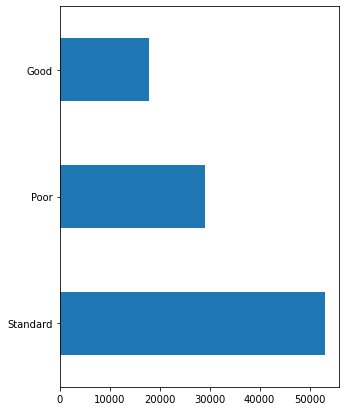

In [ ]:
credit_info['Credit_Score'].value_counts().plot.barh(figsize = (5,7))

All done with Credit_Score

# Modeling 

For each customer, there are 8 entries. I only need one of each that will be the last entry, so I will delete the other 7.

In [ ]:
credit_info_duplicates_dropped = credit_info.drop_duplicates(subset=['Customer_ID'], keep='last', ignore_index = True)

In [ ]:
credit_info_duplicates_dropped

Customer_ID   Month   Age     Occupation  Annual_Income  \
0       CUS_0xd40  August  23.0      Scientist       19114.12   
1      CUS_0x21b1  August  28.0        Teacher       34847.84   
2      CUS_0x2dbc  August  34.0       Engineer      143162.64   
3      CUS_0xb891  August  55.0   Entrepreneur       30689.89   
4      CUS_0x1cdb  August  21.0      Developer       35547.71   
...           ...     ...   ...            ...            ...   
12495  CUS_0x372c  August  19.0         Lawyer       42903.79   
12496   CUS_0xf16  August  45.0  Media Manager       16680.35   
12497  CUS_0xaf61  August  50.0         Writer       37188.10   
12498  CUS_0x8600  August  29.0      Architect       20002.88   
12499  CUS_0x942c  August  25.0       Mechanic       39628.99   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0                1824.843333                3.0              4.0   
1                3037.986667                2.0              4.0   
2               12187.220000                1.0              5.0   
3                2612.490833                2.0              5.0   
4                2853.309167                7.0              5.0   
...                      ...                ...              ...   
12495            3468.315833                0.0              4.0   
12496            1528.029167                1.0              1.0   
12497            3097.008333                1.0              4.0   
12498            1929.906667               10.0              8.0   
12499            3359.415833                4.0              6.0   

       Interest_Rate  Num_of_Loan  ...  Credit_Mix  Outstanding_Debt  \
0                3.0          4.0  ...        Good            809.98   
1                6.0          1.0  ...        Good            605.03   
2                8.0          3.0  ...        Good           1303.01   
3                4.0          1.0  ...        Good            632.46   
4                5.0          0.0  ...    Standard            943.86   
...              ...          ...  ...         ...               ...   
12495            6.0          1.0  ...        Good           1079.48   
12496            5.0          4.0  ...        Good            897.16   
12497            5.0          3.0  ...        Good            620.64   
12498           29.0          5.0  ...         Bad           3571.70   
12499            7.0          2.0  ...        Good            502.38   

       Credit_Utilization_Ratio  Credit_History_Age Payment_of_Min_Amount  \
0                     23.933795                22.0                    No   
1                     32.933856                27.0                    No   
2                     38.374753                18.0                    No   
3                     27.332515                17.0                    No   
4                     25.862922                31.0                   Yes   
...                         ...                 ...                   ...   
12495                 35.716618                28.0                    No   
12496                 41.212367                21.0                    No   
12497                 39.300980                30.0                    No   
12498                 37.140784                 6.0                   Yes   
12499                 34.192463                31.0                    No   

       Total_EMI_per_month  Amount_invested_monthly  \
0                49.574949                81.057408   
1                18.816215                84.704001   
2               246.992320               260.491131   
3                16.415452                84.179678   
4                 0.000000               134.962068   
...                    ...                      ...   
12495            34.975457               115.017705   
12496            41.113561                73.155261   
12497            84.205949               104.391082   
12498            60.964772                75.324698   
12499        

In [ ]:
credit_info_duplicates_dropped.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Drop Customer_ID and Month columns

In [ ]:
credit_info_duplicates_dropped.drop(columns=['Customer_ID', 'Month'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
credit_info_duplicates_dropped

Age     Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      23.0      Scientist       19114.12            1824.843333   
1      28.0        Teacher       34847.84            3037.986667   
2      34.0       Engineer      143162.64           12187.220000   
3      55.0   Entrepreneur       30689.89            2612.490833   
4      21.0      Developer       35547.71            2853.309167   
...     ...            ...            ...                    ...   
12495  19.0         Lawyer       42903.79            3468.315833   
12496  45.0  Media Manager       16680.35            1528.029167   
12497  50.0         Writer       37188.10            3097.008333   
12498  29.0      Architect       20002.88            1929.906667   
12499  25.0       Mechanic       39628.99            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                    3.0              4.0            3.0          4.0   
1                    2.0              4.0            6.0          1.0   
2                    1.0              5.0            8.0          3.0   
3                    2.0              5.0            4.0          1.0   
4                    7.0              5.0            5.0          0.0   
...                  ...              ...            ...          ...   
12495                0.0              4.0            6.0          1.0   
12496                1.0              1.0            5.0          4.0   
12497                1.0              4.0            5.0          3.0   
12498               10.0              8.0           29.0          5.0   
12499                4.0              6.0            7.0          2.0   

       Delay_from_due_date  Num_of_Delayed_Payment  ...  Credit_Mix  \
0                        3                     6.5  ...        Good   
1                        3                     3.0  ...        Good   
2                        8                     6.0  ...        Good   
3                        4                     6.0  ...        Good   
4                        1                    15.0  ...    Standard   
...                    ...                     ...  ...         ...   
12495                    9                     0.0  ...        Good   
12496                    1                     0.0  ...        Good   
12497                    7                    12.0  ...        Good   
12498                   33                    25.0  ...         Bad   
12499                   18                     6.0  ...        Good   

       Outstanding_Debt Credit_Utilization_Ratio  Credit_History_Age  \
0                809.98                23.933795                22.0   
1                605.03                32.933856                27.0   
2               1303.01                38.374753                18.0   
3                632.46                27.332515                17.0   
4                943.86                25.862922                31.0   
...                 ...                      ...                 ...   
12495           1079.48                35.716618                28.0   
12496            897.16                41.212367                21.0   
12497            620.64                39.300980                30.0   
12498           3571.70                37.140784                 6.0   
12499            502.38                34.192463                31.0   

       Payment_of_Min_Amount  Total_EMI_per_month Amount_invested_monthly  \
0                         No            49.574949               81.057408   
1                         No            18.816215               84.704001   
2                         No           246.992320              260.491131   
3                         No            16.415452               84.179678   
4                        Yes             0.000000              134.962068   
...                      ...                  ...                     ...   
12495                     No            34.975457        

In [ ]:
credit_info_duplicates_dropped.isna().sum()

Age                          0
Occupation                   0
Annual_Income                0
Monthly_Inhand_Salary       32
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Credit_History_Age           0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
dtype: int64

Drop rows with NAs

In [ ]:
credit_info_duplicates_dropped.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
credit_info_duplicates_dropped.isna().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [ ]:
credit_info_duplicates_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12468 entries, 0 to 12499
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12468 non-null  float64
 1   Occupation                12468 non-null  object 
 2   Annual_Income             12468 non-null  float64
 3   Monthly_Inhand_Salary     12468 non-null  float64
 4   Num_Bank_Accounts         12468 non-null  float64
 5   Num_Credit_Card           12468 non-null  float64
 6   Interest_Rate             12468 non-null  float64
 7   Num_of_Loan               12468 non-null  float64
 8   Delay_from_due_date       12468 non-null  int64  
 9   Num_of_Delayed_Payment    12468 non-null  float64
 10  Changed_Credit_Limit      12468 non-null  float64
 11  Num_Credit_Inquiries      12468 non-null  float64
 12  Credit_Mix                12468 non-null  object 
 13  Outstanding_Debt          12468 non-null  float64
 14  Credit

Correlation Heatmap

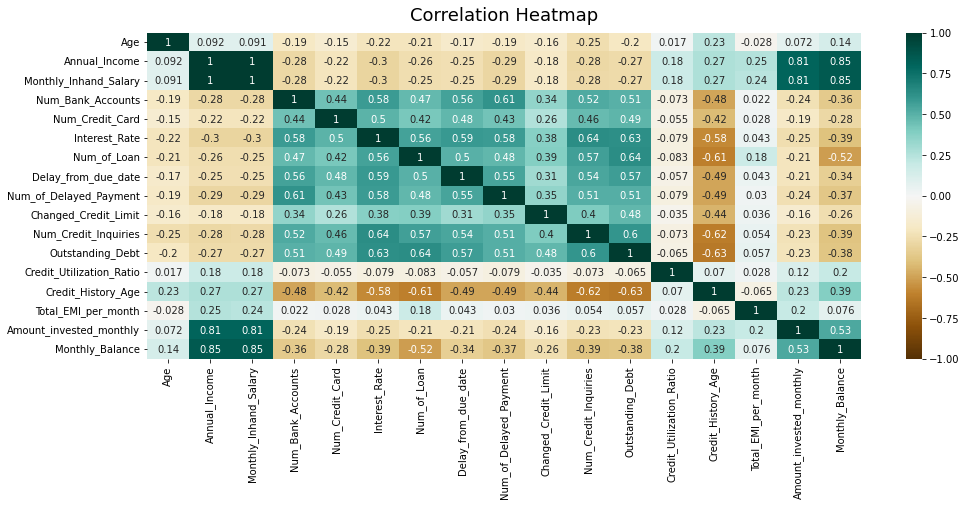

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(credit_info_duplicates_dropped.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

Monthly Inhand Salary, Amount Invested Monthly and Monthly Balance have a big correlation with Annual Income. I will drop those columns.


In [ ]:
credit_info_duplicates_dropped.drop(columns=['Monthly_Inhand_Salary', 'Amount_invested_monthly', 'Monthly_Balance'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
credit_info_duplicates_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12468 entries, 0 to 12499
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       12468 non-null  float64
 1   Occupation                12468 non-null  object 
 2   Annual_Income             12468 non-null  float64
 3   Num_Bank_Accounts         12468 non-null  float64
 4   Num_Credit_Card           12468 non-null  float64
 5   Interest_Rate             12468 non-null  float64
 6   Num_of_Loan               12468 non-null  float64
 7   Delay_from_due_date       12468 non-null  int64  
 8   Num_of_Delayed_Payment    12468 non-null  float64
 9   Changed_Credit_Limit      12468 non-null  float64
 10  Num_Credit_Inquiries      12468 non-null  float64
 11  Credit_Mix                12468 non-null  object 
 12  Outstanding_Debt          12468 non-null  float64
 13  Credit_Utilization_Ratio  12468 non-null  float64
 14  Credit

In [ ]:
credit_info_duplicates_dropped.skew(axis = 0, skipna = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age                          0.208921
Annual_Income                1.129725
Num_Bank_Accounts           -0.188904
Num_Credit_Card              0.227905
Interest_Rate                0.495500
Num_of_Loan                  0.444347
Delay_from_due_date          0.966882
Num_of_Delayed_Payment      -0.224752
Changed_Credit_Limit         0.733766
Num_Credit_Inquiries         0.405378
Outstanding_Debt             1.206686
Credit_Utilization_Ratio     0.004624
Credit_History_Age          -0.048957
Total_EMI_per_month         61.697305
dtype: float64

Change data types

In [ ]:
credit_info_duplicates_dropped['Delay_from_due_date'] = credit_info_duplicates_dropped['Delay_from_due_date'].astype('float')

credit_info_duplicates_dropped['Occupation'] = credit_info_duplicates_dropped['Occupation'].astype('category')
credit_info_duplicates_dropped['Credit_Mix'] = credit_info_duplicates_dropped['Credit_Mix'].astype('category')
credit_info_duplicates_dropped['Payment_of_Min_Amount'] = credit_info_duplicates_dropped['Payment_of_Min_Amount'].astype('category')
credit_info_duplicates_dropped['Payment_Behaviour'] = credit_info_duplicates_dropped['Payment_Behaviour'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [ ]:
credit_info_duplicates_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12468 entries, 0 to 12499
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       12468 non-null  float64 
 1   Occupation                12468 non-null  category
 2   Annual_Income             12468 non-null  float64 
 3   Num_Bank_Accounts         12468 non-null  float64 
 4   Num_Credit_Card           12468 non-null  float64 
 5   Interest_Rate             12468 non-null  float64 
 6   Num_of_Loan               12468 non-null  float64 
 7   Delay_from_due_date       12468 non-null  float64 
 8   Num_of_Delayed_Payment    12468 non-null  float64 
 9   Changed_Credit_Limit      12468 non-null  float64 
 10  Num_Credit_Inquiries      12468 non-null  float64 
 11  Credit_Mix                12468 non-null  category
 12  Outstanding_Debt          12468 non-null  float64 
 13  Credit_Utilization_Ratio  12468 non-null  floa

In [ ]:
credit_info_duplicates_dropped.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')

In [ ]:
predictors = ['Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
              'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
              'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour',] 
outcomes = 'Credit_Score'

In [ ]:
X = pd.get_dummies(credit_info_duplicates_dropped[predictors], drop_first=True)
y = credit_info_duplicates_dropped[outcomes]

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
!pip install dmba
from dmba import classificationSummary, regressionSummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.2 MB/s 
no display found. Using non-interactive Agg backend


Partition data

In [ ]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

Create lists for the models and their accuracy to compare them leater

In [ ]:
model = []
accuracy = []

## Logistic Regression

In [ ]:
logit_reg = LogisticRegression(random_state=1)
logit_reg.fit(train_X, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1)

Display the Confusion Matrix

In [ ]:
classes = sorted(y.unique())

In [ ]:
classificationSummary(valid_y, logit_reg.predict(valid_X), class_names=classes)

Confusion Matrix (Accuracy 0.5174)

         Prediction
  Actual     Good     Poor Standard
    Good       25       27      936
    Poor        4      321     1112
Standard       27      301     2235


In [ ]:
model.append('Logistic Regression')
accuracy.append(accuracy_score(valid_y,logit_reg.predict(valid_X)))

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree

Full-grown classification tree

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.342525 to fit



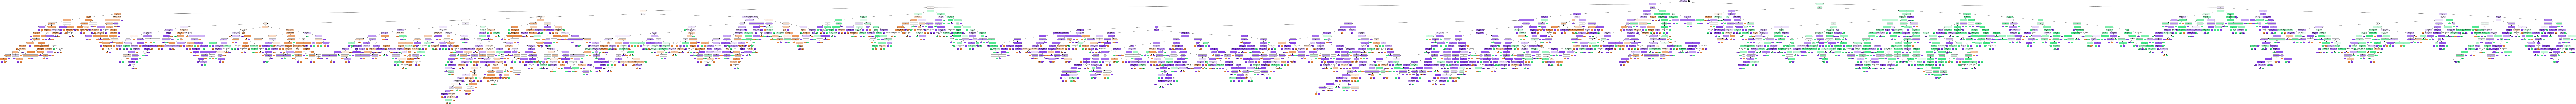

In [ ]:
fullClassTree = DecisionTreeClassifier(random_state=1)
fullClassTree.fit(train_X, train_y)
plotDecisionTree(fullClassTree, feature_names=train_X.columns)

Confusion Matrices and Accuracy

In [ ]:
classes = sorted(y.unique())

In [ ]:
classificationSummary(valid_y, fullClassTree.predict(valid_X), class_names=classes)

Confusion Matrix (Accuracy 0.5112)

         Prediction
  Actual     Good     Poor Standard
    Good      386      147      455
    Poor      116      688      633
Standard      454      633     1476


In [ ]:
model.append('Decision Tree')
accuracy.append(accuracy_score(valid_y,fullClassTree.predict(valid_X)))

GridSearch

In [ ]:
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
                         'min_samples_split': [10, 20, 30, 40, 50]})

In [ ]:
classificationSummary(valid_y, gridSearch.predict(valid_X), class_names=classes)

Confusion Matrix (Accuracy 0.6213)

         Prediction
  Actual     Good     Poor Standard
    Good      540       45      403
    Poor       96      844      497
Standard      412      436     1715


In [ ]:
model.append('Decision Tree with GridSearch 1')
accuracy.append(accuracy_score(valid_y,gridSearch.predict(valid_X)))

In [ ]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [14, 15, 16, 18, 20, ], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_impurity_decrease': [0, 0.001, 0.002, 0.003,
                                                   0.005, 0.006, 0.007, 0.008],
                         'min_samples_split': [14, 15, 16, 18, 20]})

In [ ]:
classificationSummary(valid_y, gridSearch.predict(valid_X), class_names=classes)

Confusion Matrix (Accuracy 0.6213)

         Prediction
  Actual     Good     Poor Standard
    Good      540       45      403
    Poor       96      844      497
Standard      412      436     1715


In [ ]:
model.append('Decision Tree with GridSearch 2')
accuracy.append(accuracy_score(valid_y,gridSearch.predict(valid_X)))

Smaller classification tree

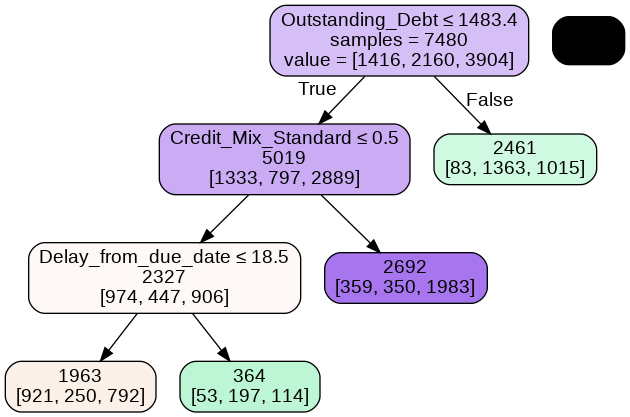

In [ ]:
smallClassTree = DecisionTreeClassifier(max_depth=30, min_samples_split=20, 
                                        min_impurity_decrease=0.01, random_state=1)
smallClassTree.fit(train_X, train_y)
plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [ ]:
classes = sorted(y.unique())

In [ ]:
classificationSummary(valid_y, smallClassTree.predict(valid_X), class_names=classes)

Confusion Matrix (Accuracy 0.5876)

         Prediction
  Actual     Good     Poor Standard
    Good      644      102      242
    Poor      165     1026      246
Standard      558      744     1261


In [ ]:
model.append('Smaller Classification Tree')
accuracy.append(accuracy_score(valid_y,smallClassTree.predict(valid_X)))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

In [ ]:
classes = sorted(y.unique())

In [ ]:
classificationSummary(valid_y, rf.predict(valid_X), class_names=classes)

Confusion Matrix (Accuracy 0.6167)

         Prediction
  Actual     Good     Poor Standard
    Good      413       27      548
    Poor       61      827      549
Standard      291      436     1836


In [ ]:
model.append('Random Forest')
accuracy.append(accuracy_score(valid_y,rf.predict(valid_X)))

Plot feature importance

In [ ]:
lst = X.columns
lst2 = rf.feature_importances_

df_feature_imp = pd.DataFrame(list(zip(lst,lst2)),
			columns = ['Column_Name', 'Feature_Importance'])

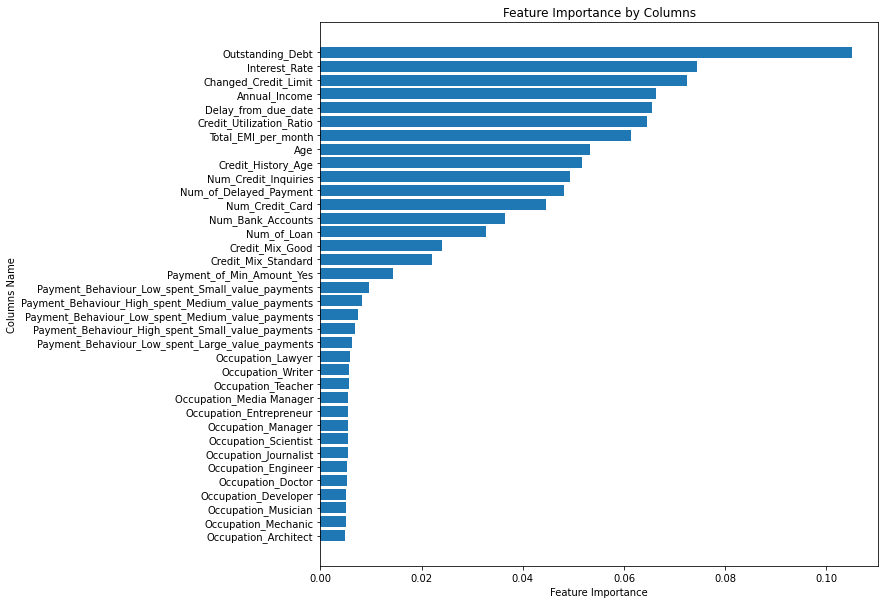

In [ ]:
plt.figure(figsize=(10,10))
df_feature_imp.sort_values('Feature_Importance',inplace=True)
plt.barh(df_feature_imp['Column_Name'],df_feature_imp['Feature_Importance'])
plt.title('Feature Importance by Columns')
plt.ylabel('Columns Name')
plt.xlabel('Feature Importance')

plt.show()

Only considering features with 0.05 or more

In [ ]:
feature_importance = df_feature_imp['Column_Name'][df_feature_imp['Feature_Importance']>=0.05]

In [ ]:
train_X_RF, valid_X_RF, train_y_RF, valid_y_RF = train_test_split(X[feature_importance], y, test_size=0.4, random_state=1)

In [ ]:
rf.fit(train_X_RF, train_y_RF)

classificationSummary(valid_y_RF, rf.predict(valid_X_RF), class_names=classes)

Confusion Matrix (Accuracy 0.5832)

         Prediction
  Actual     Good     Poor Standard
    Good      288       32      668
    Poor       66      789      582
Standard      290      441     1832


In [ ]:
model.append('Random Forest - Feature Importance: >=0.05')
accuracy.append(accuracy_score(valid_y,rf.predict(valid_X_RF)))

Only considering features with 0.06 or more

In [ ]:
feature_importance2 = df_feature_imp['Column_Name'][df_feature_imp['Feature_Importance']>=0.06]

In [ ]:
train_X_RF_2, valid_X_RF_2, train_y_RF_2, valid_y_RF_2 = train_test_split(X[feature_importance2], y, test_size=0.4, random_state=1)

In [ ]:
rf.fit(train_X_RF_2, train_y_RF_2)
classificationSummary(valid_y_RF_2, rf.predict(valid_X_RF_2), class_names=classes)

Confusion Matrix (Accuracy 0.5860)

         Prediction
  Actual     Good     Poor Standard
    Good      278       29      681
    Poor       57      799      581
Standard      287      430     1846


In [ ]:
model.append('Random Forest - Feature Importance: >=0.06')
accuracy.append(accuracy_score(valid_y,rf.predict(valid_X_RF_2)))

Only considering features with 0.08 or more

In [ ]:
feature_importance3 = df_feature_imp['Column_Name'][df_feature_imp['Feature_Importance']>=0.08]

In [ ]:
train_X_RF_3, valid_X_RF_3, train_y_RF_3, valid_y_RF_3 = train_test_split(X[feature_importance3], y, test_size=0.4, random_state=1)

In [ ]:
rf.fit(train_X_RF_3, train_y_RF_3)
classificationSummary(valid_y_RF_3, rf.predict(valid_X_RF_3), class_names=classes)

Confusion Matrix (Accuracy 0.4493)

         Prediction
  Actual     Good     Poor Standard
    Good      259      154      575
    Poor      161      599      677
Standard      534      646     1383


In [ ]:
model.append('Random Forest - Feature Importance: >=0.08')
accuracy.append(accuracy_score(valid_y,rf.predict(valid_X_RF_3)))

GridSearch

In [ ]:
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch1 = GridSearchCV(RandomForestClassifier(random_state=1), 
                          param_grid, cv=5, n_jobs=-1)
gridSearch1.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
                         'min_samples_split': [10, 20, 30, 40, 50]})

In [ ]:
classificationSummary(valid_y, gridSearch1.predict(valid_X), class_names=classes)

Confusion Matrix (Accuracy 0.6159)

         Prediction
  Actual     Good     Poor Standard
    Good      409       20      559
    Poor       64      828      545
Standard      297      431     1835


In [ ]:
model.append('Random Forest with GridSearch 1')
accuracy.append(accuracy_score(valid_y,gridSearch1.predict(valid_X)))

RF with hyperparameters

In [ ]:
rf_hype = RandomForestClassifier(n_estimators=500, max_features="auto", max_depth=15,random_state=1)
# max depth: maximum depth of the tree
rf_hype.fit(train_X, train_y)
classificationSummary(valid_y, rf_hype.predict(valid_X), class_names=classes)

Confusion Matrix (Accuracy 0.6169)

         Prediction
  Actual     Good     Poor Standard
    Good      418       26      544
    Poor       58      839      540
Standard      311      432     1820


In [ ]:
model.append('Random Forest with Hyperparameters')
accuracy.append(accuracy_score(valid_y,rf_hype.predict(valid_X)))

## Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
classes = sorted(y.unique())
nn = MLPClassifier(hidden_layer_sizes=(3),activation='logistic', solver='lbfgs', random_state=1)

nn.fit(train_X, train_y)

MLPClassifier(activation='logistic', hidden_layer_sizes=3, random_state=1,
              solver='lbfgs')

In [ ]:
classificationSummary(valid_y, nn.predict(valid_X), class_names=classes)

Confusion Matrix (Accuracy 0.5138)

         Prediction
  Actual     Good     Poor Standard
    Good        0        0      988
    Poor        0        0     1437
Standard        0        0     2563


In [ ]:
model.append('Neural Network')
accuracy.append(accuracy_score(valid_y,nn.predict(valid_X)))

Normalize data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaleInput = MinMaxScaler()
scaleOutput = MinMaxScaler()
X_norm = scaleInput.fit_transform(X)

In [ ]:
train_X_NN, valid_X_NN, train_y_NN, valid_y_NN = train_test_split(X_norm, y, test_size=0.4, random_state=1)

In [ ]:
nn_norm = MLPClassifier(hidden_layer_sizes=(3),activation='logistic', solver='lbfgs', random_state=1)

nn_norm.fit(train_X_NN, train_y_NN)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=3, random_state=1,
              solver='lbfgs')

In [ ]:
classificationSummary(valid_y_NN, nn_norm.predict(valid_X_NN), class_names=classes)

Confusion Matrix (Accuracy 0.6093)

         Prediction
  Actual     Good     Poor Standard
    Good      506       33      449
    Poor      109      828      500
Standard      393      465     1705


In [ ]:
model.append('Neural Network - Normalized')
accuracy.append(accuracy_score(valid_y,nn_norm.predict(valid_X_NN)))

## Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:
svma = svm.SVC(random_state=1)
svma.fit(train_X, train_y)

SVC(random_state=1)

In [ ]:
classificationSummary(valid_y, svma.predict(valid_X), class_names=classes)

Confusion Matrix (Accuracy 0.5138)

         Prediction
  Actual     Good     Poor Standard
    Good        0        0      988
    Poor        0        0     1437
Standard        0        0     2563


In [ ]:
model.append('Support Vector Machine')
accuracy.append(accuracy_score(valid_y,svma.predict(valid_X)))

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

Not include 'Delay_from_due_date' because it has negatives values

In [ ]:
predictors_naive_bayes = ['Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
               'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
              'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour',] 
outcomes_naive_bayes = 'Credit_Score'

X_naive_bayes = pd.get_dummies(credit_info_duplicates_dropped[predictors_naive_bayes], drop_first=True)
y_naive_bayes = credit_info_duplicates_dropped[outcomes_naive_bayes]

train_X_naive_bayes, valid_X_naive_bayes, train_y_naive_bayes, valid_y_naive_bayes = train_test_split(X_naive_bayes, y_naive_bayes, test_size=0.4, random_state=1)

In [ ]:
naive_bayes = MultinomialNB(alpha=0.01)
naive_bayes.fit(train_X_naive_bayes, train_y_naive_bayes)

# predict probabilities
predProb_train = naive_bayes.predict_proba(train_X_naive_bayes)
predProb_valid = naive_bayes.predict_proba(valid_X_naive_bayes)
# predict class membership
y_valid_pred = naive_bayes.predict(valid_X_naive_bayes)

In [ ]:
classes = sorted(y_naive_bayes.unique())

In [ ]:
classificationSummary(valid_y_naive_bayes, naive_bayes.predict(valid_X_naive_bayes), class_names=classes)

Confusion Matrix (Accuracy 0.4008)

         Prediction
  Actual     Good     Poor Standard
    Good      599      203      186
    Poor      268      926      243
Standard     1089     1000      474


In [ ]:
model.append('Naive Bayes')
accuracy.append(accuracy_score(valid_y,naive_bayes.predict(valid_X_naive_bayes)))

## XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=1, random_state=1)
xg_cl.fit(train_X, train_y)

XGBClassifier(n_estimators=10, objective='multi:softprob', random_state=1,
              seed=1)

In [ ]:
classificationSummary(valid_y, xg_cl.predict(valid_X), class_names=classes)

Confusion Matrix (Accuracy 0.6141)

         Prediction
  Actual     Good     Poor Standard
    Good      508       13      467
    Poor       86      754      597
Standard      388      374     1801


In [ ]:
model.append('XGBoost')
accuracy.append(accuracy_score(valid_y,xg_cl.predict(valid_X)))

## Model Accuracy

In [ ]:
df_model_accuracy = pd.DataFrame(list(zip(model, accuracy)),
               columns =['Model', 'Accuracy'])

In [ ]:
df_model_accuracy.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)

Model  Accuracy
0              Decision Tree with GridSearch 1  0.621291
1              Decision Tree with GridSearch 2  0.621291
2           Random Forest with Hyperparameters  0.616881
3                                Random Forest  0.616680
4              Random Forest with GridSearch 1  0.615878
5                                      XGBoost  0.614074
6                  Neural Network - Normalized  0.609262
7                  Smaller Classification Tree  0.587610
8   Random Forest - Feature Importance: >=0.06  0.586006
9   Random Forest - Feature Importance: >=0.05  0.583200
10                         Logistic Regression  0.517442
11                              Neural Network  0.513833
12                      Support Vector Machine  0.513833
13                               Decision Tree  0.511227
14  Random Forest - Feature Importance: >=0.08  0.449278
15                                 Naive Bayes  0.400762

**The best model for the credit score classification would be Decision Tree with GridSearch 1 o 2**